# Exploring Key Drivers of Life Expectancy from 2000 to 2015

**Group C5 Members**: Raymond Williams, Takeru Inoue, Zeyu Qi

We are analyzing life expectancy data from 2000 to 2015 across multiple countries. 
This dataset includes various social, economic, and health-related indicators. 

---

## 1. Introduction & Data Import

### 1.1. Verifying Filtered Data

Below, we load `life.csv` to confirm the final shape and columns.
We also display the first few rows to make sure everything looks as expected.

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('life.csv', delimiter=";")
data.head(5)

Country  Year Continent  Least Developed  Life Expectancy  Population  \
0  Albania  2000    Europe            False           73.955     3089027   
1  Albania  2001    Europe            False           74.288     3060173   
2  Albania  2002    Europe            False           74.579     3051010   
3  Albania  2003    Europe            False           74.828     3039616   
4  Albania  2004    Europe            False           75.039     3026939   

   CO2 emissions  Health expenditure  Electric power consumption  Forest area  \
0       1.026213            7.233370                 1414.703784    28.076642   
1       1.055496            7.139524                 1449.647413    28.123248   
2       1.232379            6.909341                 1351.230796    28.169854   
3       1.338985            7.063490                 1578.165919    28.216460   
4       1.404059            6.773372                 1469.264539    28.263066   

   GDP per capita  Individuals using the Internet  Military expenditure  \
0     3860.804627                        0.114097              1.246360   
1     4299.546493                        0.325798              1.309291   
2     4661.402695                        0.390081              1.320034   
3     5000.049363                        0.971900              1.336843   
4     5427.732662                        2.420388              1.381158   

   People practicing open defecation  \
0                           0.888853   
1                           0.836397   
2                           0.781899   
3                           0.728191   
4                           0.675281   

   People using at least basic drinking water services  Obesity among adults  \
0                                          86.754471                    12.8   
1                                          86.904070                    13.3   
2                                          87.451635                    13.9   
3                                          87.987194                    14.4   
4                                          88.510583                    15.0   

   Beer consumption per capita  
0                      1.33431  
1                      1.48995  
2                      1.28697  
3                      1.44830  
4                      1.37617

### Major Takeaways

1. **Column Verification**: We have 17 columns, focusing on life expectancy, internet usage, health expenditure, etc.
2. **Row Count**: The dataset has around 1900+ rows, indicating a fairly large number of country-year observations.
3. **Ready for EDA**: The filtered dataset will allow us to investigate the relationships between various indicators and life expectancy.

## 2. Exploratory Data Analysis

### 2.1. How does health expenditure relate to life expectancy?

A big part of this project for us is understanding what the major factors are that affect the life expectency of a given country or region. Naturally, a good assumption to make is that the countries that spend more on health will have a better life expectency than those who don't. We will continue to expand on this question throughout the project, but let's start with some EDA.

#### A summary of the data

A good first step in understanding the health expenditure feature as it relates to life expectancy is to view the summary stats. That is what we will do here.

In [12]:
df_selected = data[['Health expenditure', 'Life Expectancy', 'Continent']]

summary_stats = df_selected.describe()
summary_stats

Health expenditure  Life Expectancy
count         1904.000000      1904.000000
mean             6.096855        70.817343
std              2.451488         8.489200
min              0.410000        43.065000
25%              4.214776        66.857250
50%              5.862418        73.009500
75%              7.880948        76.765402
max             16.524073        83.229268

**What does this mean?**: In this dataset, health expenditure is measured as a percentage of the overall GDP. This means on average, countries spend around 6 percent of their overall GDP on health related expenditures, with the foremost country in health expenditure spending around 16.5% of its overall GDP on health related expenses.

#### Health Expenditure Distribution

In the last section, we gathered some summary statistics regarding the distribution of health expenditure, this section, we will visualize the distribution. 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

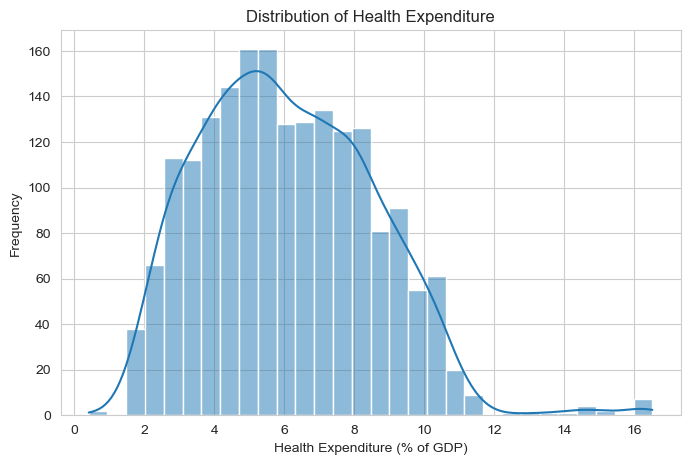

In [16]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(data['Health expenditure'], bins=30, kde=True)
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Frequency")
plt.title("Distribution of Health Expenditure")
plt.show()

The distribution of health expenditure seems to be right-skewed, meaning that most countries tend to spend a relatively low percentage of their GDPs on healthcare, while an even smaller number of countries spend an exceedingly large percentages.

**Major Takeaways**:

Most Countries Spend Pretty Normally: Most countries bunch up around a moderate level of healthcare spending. This indicates that a typical healthcare expenditure typically lies around six percent of the GDP of a given country.

Only A Few Countries Spend A Lot: The right-skew indicates that only a few countries spend a significantly higher percentage of their GDP in healthcare. These are likely higher-income nations with great healthcare systems.

Why Do Some Countries Spend So Much?: Countries that have the extremely high health expenditure may be nations with universal healthcare models, very large aging populations, or just expensive private healthcare systems.

**What does this mean?**:

Countries with low percentages of health care spend might struggle with an inadequate healthcare system, which can very well lead to a low life expectancy.

However, higher healthcare spend does not always mean better health outcomes, as system efficiency, government policy, and healthcare accessibility play really important roles in whether or not a countries healthcare system is optimal.

#### Healthcare vs. Life Expectancy

Now that we have analyzed the healthcare data on its own, we can check to see what the nature of its relationship with life expectancy.

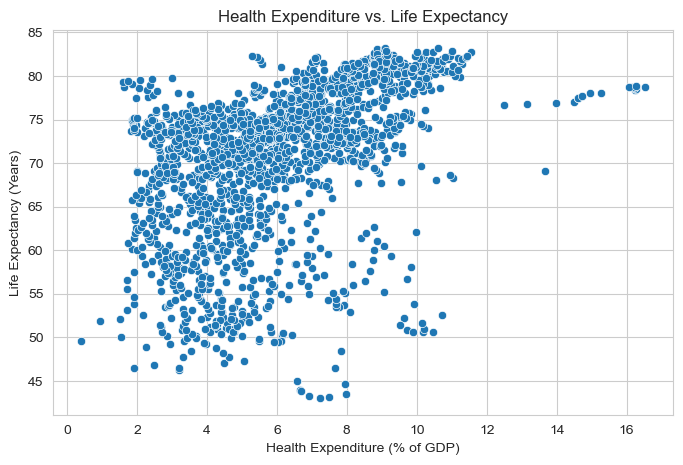

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Health expenditure'], y=data['Life Expectancy'])
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Health Expenditure vs. Life Expectancy")
plt.show()

The scatter plot displays a positive correlation between health spend and life expectancy. Thus, in general, the more a country spends on health care, the longer its population tends to live. However, the relationship does not appear to be perfectly linear, and demonstrates a lot of noise.

**Major Takeaways**:

The trend is overall positive: Countries with higher healthercare spend also demonstrated a higher life expectancy. This suggests that, as a country, investing in healthcare, infrastructures, and medical advancements lead to some sort of increase in life expectancy.

Health spend only does so much: The relationship between healthcare spend and life expectancy is much stronger at lower levels. This means that increasing healthcare spend from very low levels does a lot for increased life expectancy, but if you are already at a certain threshold for healthcare spend, the improvements in life expectancy appear to plateau.

**Outliers, Variability, and Confounds**:

With this data, there are somethings to keep in mind. For example, some countries spent a lot of money on health care, but don't get the expected increase in life expectancy. There are many reasons this could be the case. There could be inefficient healthcare systems, country-wide negative life style factors (i.e. obesity), or socioeconomic inequalities.

On the other hand, some countries achieve really good life expectancies with pretty low healthcare spending. This could be due to powerful legislation regarding public health, great preventative care, or just really efficient healthcare systems.

Furthermore, something to keep in mind when looking at this data is that higher income countries tend to cluster around the upper end of the expenditure and life expectancy range. Lower income countries just have lower spending and thus tend to lie in the low life expectancy range. This is a potential confound to keep in mind.

#### Healthcare by Continent

Finally, we can visualize the distribution of healthcare expenditure in different regions of the world. This will allow us to understand what areas of the world generally spend more on health care and use that in our analysis as we proceed.

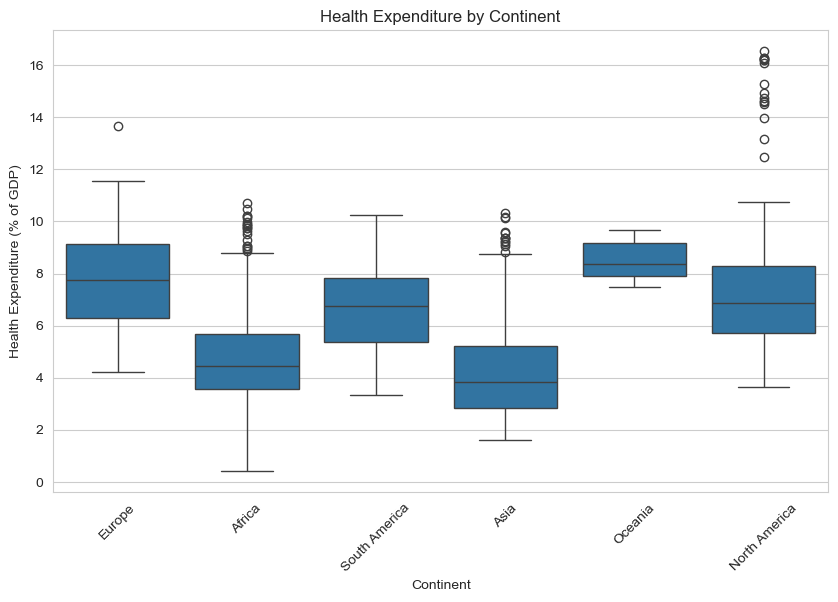

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Continent'], y=data['Health expenditure'])
plt.xlabel("Continent")
plt.ylabel("Health Expenditure (% of GDP)")
plt.title("Health Expenditure by Continent")
plt.xticks(rotation=45)
plt.show()

**Major Takeaways**:

Differences in healthcare expenditure: Some continents tend to spend more on healthcare than others. This means that these areas prioritze healthcare the most. Continents with the lower median spend might face structural challenges in health care, limited healthcare budgets, or just differing policy agendas.

Continents that have the longer IQRs have more variability in health spend. Usually this indicates the presence of a few countries within a region that spend a disproportionally large amount on health care. On the other hand, a smaller IQR suggets more uniform healthcare spending across the region. 

Some of the continents had a lot of outliers. Take North America, in this region certain countries spend a lot more on healthcare compared to their regional neighbors. Large outliers might indicate a wealthy country i.e the USA, while exceedingly small spend might indicate a developing country who just doesnt spend a lot on healthcare. 

**Understanding Our Results**:

Europe and North America have countries that lie in the upper echelons of healthcare spending. This aligns with expectations. These continents are known for containing a large amount of developed countries who have excess money to spend on health care. On the other hand, areas like Africa and Asia have lower median healthcare spend. This makes sense. In these areas there are simply fewer developed countries.

### 2.2. Is there a relationship between access to clean drinking water and life expectancy?

#### A summary of the data

In [28]:
df_clean_water = data[['People using at least basic drinking water services', 'Life Expectancy', 'Continent']]

summary_clean_water = df_clean_water[['People using at least basic drinking water services']].describe()
summary_clean_water

People using at least basic drinking water services
count                                        1904.000000  
mean                                           86.836539  
std                                            17.603121  
min                                            18.085445  
25%                                            82.268573  
50%                                            94.881928  
75%                                            99.500000  
max                                           100.000005

**What does this mean?**: Looking at our summary statistics, it appears the majority of the world has access to clean water (nearly 87%). However, our standard deviation is high, meaning that some countries have nearly complete water access while others are really struggling with water access.

#### Access to drinking water vs life expectancy

After looking at the summary statistics, we can now begin to understand the relationship between access to drinking water and life expectancy.

**Plot 1: Drinking Water vs Life Exp (All Years)**

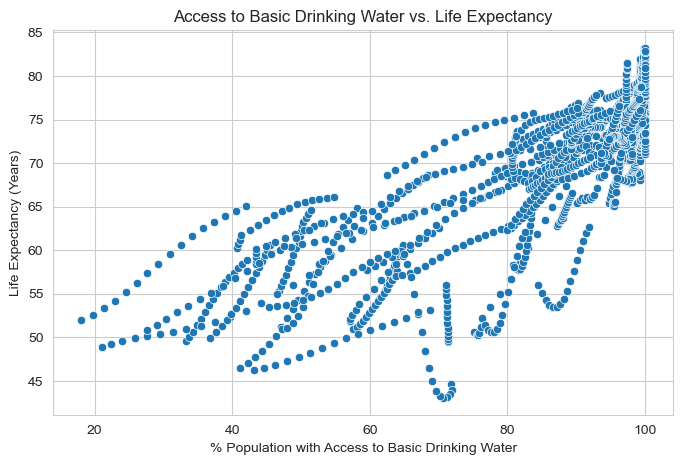

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['People using at least basic drinking water services'], y=data['Life Expectancy'])
plt.xlabel("% Population with Access to Basic Drinking Water")
plt.ylabel("Life Expectancy (Years)")
plt.title("Access to Basic Drinking Water vs. Life Expectancy")
plt.show()

**Plot 2: Drinking Water vs Life Exp (Grouping Countries and Taking Avg Over Years)**

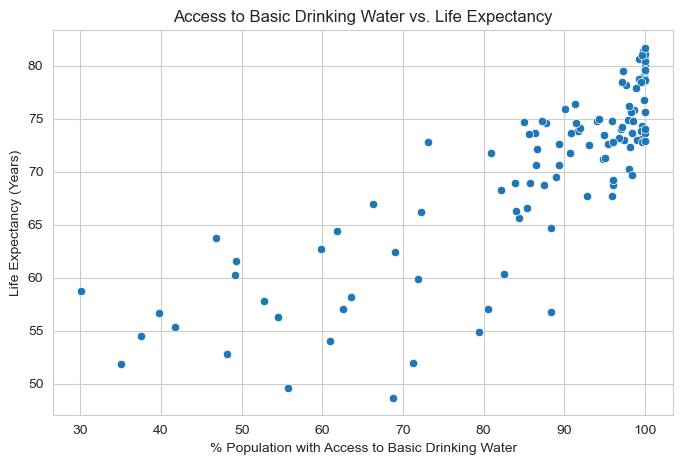

In [35]:
data_country_avg = data.groupby("Country", as_index=False).mean(numeric_only=True)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_country_avg['People using at least basic drinking water services'], 
                y=data_country_avg['Life Expectancy'])

plt.xlabel("% Population with Access to Basic Drinking Water")
plt.ylabel("Life Expectancy (Years)")
plt.title("Access to Basic Drinking Water vs. Life Expectancy")
plt.show()

**What does this mean?**: Our data displays a very strong positive correlation for the relationship between drinking water access and life expectancy. This means in general when the amount of drinking water increases, the life expectancy of said country also increases. However, per the graph, the increase in access to drinking water only helps life expectancy so much. Past 90% access, the Life Expectancy doesn't seem to increase as much as it used to before. 

#### Access to Drinking Water by Continent

We examine the distribution of clean drinking water access by continent to reveal significant regional disparities, and hopefully understand how infrastructure, economic development, and policy differences impact the water access of a region.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Europe'),
  Text(1, 0, 'Africa'),
  Text(2, 0, 'South America'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'Oceania'),
  Text(5, 0, 'North America')])

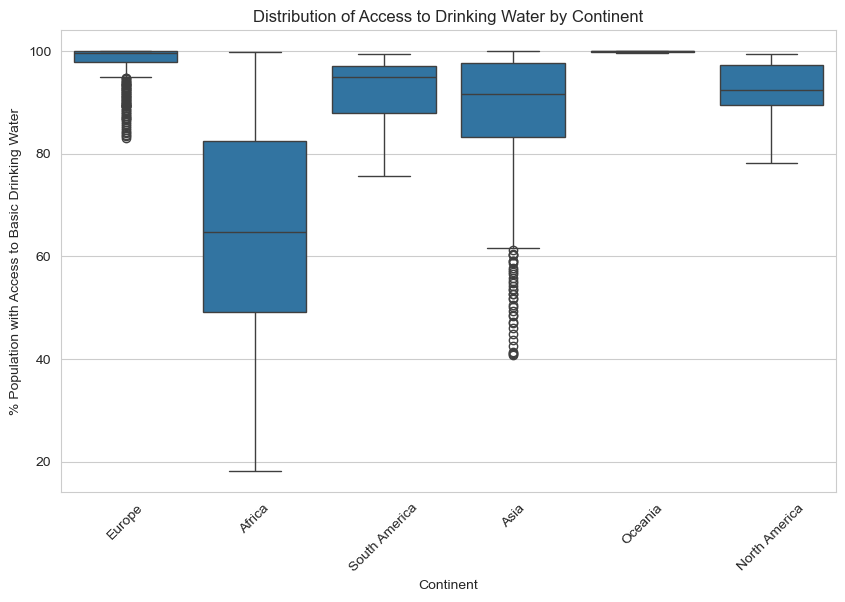

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Continent'], y=data['People using at least basic drinking water services'])
plt.xlabel("Continent")
plt.ylabel("% Population with Access to Basic Drinking Water")
plt.title("Distribution of Access to Drinking Water by Continent")
plt.xticks(rotation=45)

**Major Takeaways**:

Large Disparities: The data shows pretty large disparities in access to clean drinking water, pointing out differences in vital infrastructure, economic development, and policy choices.

Universal Drinking Water: Lots of countries have near perfect access to drinking water especially in developed regions like Oceania, Europe, and parts of North America. These regiosn are known fo their strong infrastructure which ensure basic humans rights like access to drinking water.

What Does Wide Variation Mean?: The wide variation suggests that mere economic development alone is not enough. Countries with similar GDPS levels can have such vastly different water access, depending on their policy choices, infrastructure investment, and water management.

Certain Countries Have Big Disparities: In certain countries, large urban centers might have reliable water access, but the rural areas in the same country might have really poor water access, resulting in a lot of variation in our data.

Conclusion: This data and trends being shown in respect to life expectancy highlight how in developing areas, poor water quality is directly relayed to health crisis and lower life expectancy. In later sections we will highlight whether or not this is just a reflection of a poor economy or its own issue.

### 2.3. How does obesity prevalence relate to life expectancy?

Obesity has been linked to many different lifestyle related diseases, ranging from heart disaease to cancer. How we eat and eating well is vital to making sure we live long and happy lives.

#### A summary of the data

In [44]:
data_obesity = data[['Obesity among adults', 'Life Expectancy', 'Continent']]
summary_obesity = data_obesity[['Obesity among adults']].describe()
summary_obesity

Obesity among adults
count           1904.000000
mean              16.213393
std                8.213384
min                1.100000
25%                8.600000
50%               18.000000
75%               22.300000
max               36.700000

**Major Takeaways**:

The avg obesity rate is around 16.2%, but the standard deviation (8.2%). This indicates that some countries have much higher or lower rates.

The min obesity rate (around 1.1%) suggests that in some areas, obesity is almost absent, likely due to low calorie intake or high physical activity levels.

The data seems to be a skewed distribution (with a maximum exceeding 40%) this reflects that some wealthier nations might face a significant obesity epidemic, while poorer regions may struggle with malnutrition instead of obesity.

#### Obesity Distribution

Now that we have explored the basic summary stats related to obesity, we can visualize the ditribution tobetter understand how obesity is spread across different countries

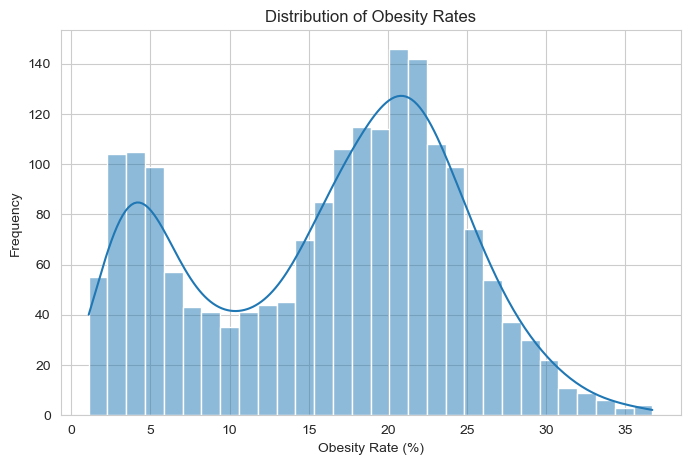

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Obesity among adults'], bins=30, kde=True)
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Obesity Rates")
plt.show()

**Major Takeaways**:

The distribution of obesity rates is right-skewed (nearly - bimodal), meaning that most countries either have relatively low obesity rates (nearly non-existent), while the rest of the data center around the 20 percent mark.

A large amount of countries have obesity rates below 20%, suggesting that global obesity is not evenly distributed.

The tail end of the distribution contains obesity rates exceeding 40%. This indicates a major public health concern in some high-income nations. In countries like this sedentary lifestyles and calorie-dense diets contribute to rising obesity.

#### Obesity Rate vs. Life Expectancy

Now we can take the obesity rate and see how it relates to life expectancy. Naturally we would anticipate that higher obesity rates would lead lower life expectancies.

**Plot 1: Obesity Rate vs Life Exp (All Years)**

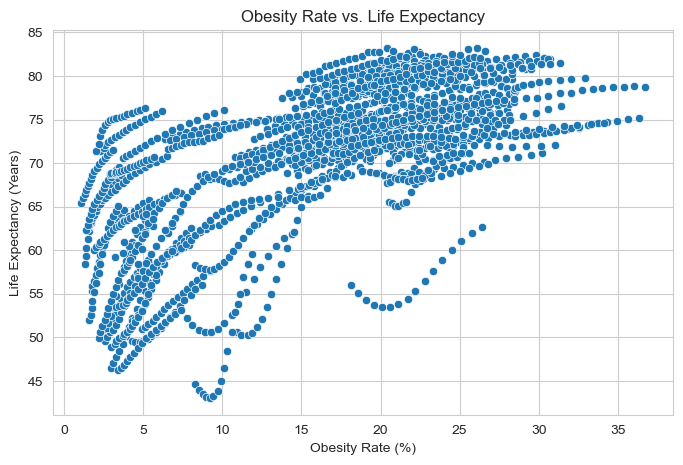

In [53]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Obesity among adults'], y=data['Life Expectancy'])
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Obesity Rate vs. Life Expectancy")
plt.show()

**Plot 2: Obesity Rate vs Life Exp (Grouping Countries and Taking Avg Over Years)**

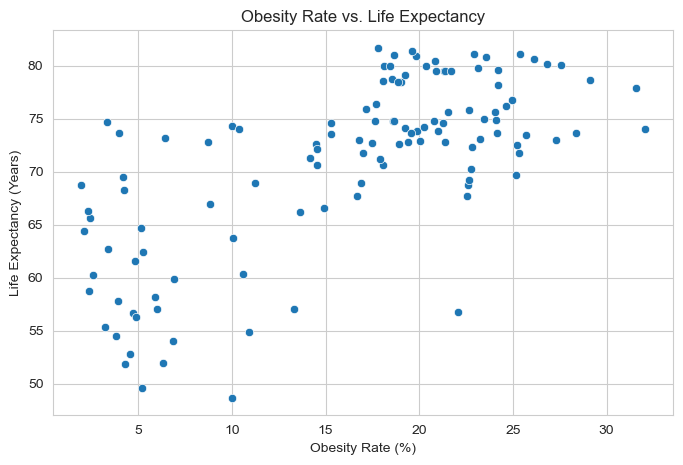

In [55]:
data_country_avg = data.groupby("Country", as_index=False).mean(numeric_only=True)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_country_avg['Obesity among adults'], y=data_country_avg['Life Expectancy'])
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Life Expectancy (Years)")
plt.title("Obesity Rate vs. Life Expectancy")
plt.show()

**Major Takeaways**:

There is no strong linear relationship between obesity rates and life expectancy. Although there still does seem to be some sort of relationship present in the data.

Some countries with super high obesity rates still have long life expectancy. This is likely due to strong healthcare systems which can mitigate obesity-related health risks.

However, in some of the other nations, high obesity is associated with a shorter life expectancy, highlighting the negative long-term health risks of obesity-related conditions like heart disease, diabetes, and hypertension.

**Understanding the Data**:

>**Economic and Healthcare Factors**
>
>Countries that have higher obesity rates are also the ones that have higher GDP per capita, better healthcare systems, and higher life expectancy overall. These nations might actually have longer life spans despite suffering obesity related health risks because of better medical interventions, nutrition, and disease management.

>**Obesity as a Proxy for Development**
>
>In many cases, higher obesity rates are associated with the wealthier nations, where caloric intake is higher, but malnutrition and infectious diseases are less prevalent. This makes sense as the wealthier a nation is, the more likely citizens are to over eat and become obese. Many low-obesity countries havethe opposite problem. They struggle with severe malnutrition, even worse healthcare access, and higher child mortality rates, which are outside factors that bring down their life expectancy.

>**Diminishing Returns & Health Risks**:
>
>Obesity does correlate positively with life expectancy at a world-wide scale, very high obesity levels (>30-40%) are linked to increased rates of chronic diseases.
Over time, countries with extreme obesity levels might see even bigger issues like stagnation or declines in life expectancy due to rising heart disease, diabetes, and metabolic disorders combined with an aging population. In essence these countries will face lower life expectancies in the long run



**Key Takeaway**:

Obesity in its lonesome doesn't determine life expectancy, but higher obesity rates are often found in the wealthier nations with longer lifespans. However, if obesity rates continue to rise unchecked, the long-term health consequences may start negatively impacting life expectancy in the future. In essence this part of the EDA has shown that obesity often serves as a proxy for the economic development of a country rather than a factor on its own that contributes to a country's overall avg. life exp.

### 2.4. Distribution of GDP per Capita

We begin by calculating basic statistics (mean, median, std) for GDP per capita, 
plot a histogram to see its distribution, and then relate it to life expectancy.

Mean        Median  Standard Deviation
GDP Summary  18094.113142  11155.012085        19389.828835

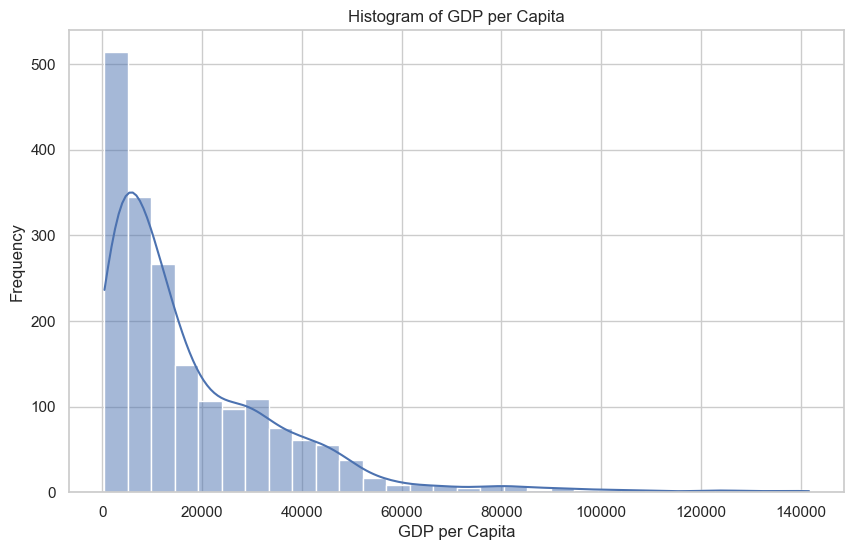

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind, mannwhitneyu, f_oneway

# Load the CSV
url = "life.csv"
df = pd.read_csv(url, sep=';')

sns.set(style='whitegrid')

# Summary Stats for GDP per Capita
gdp_mean = df['GDP per capita'].mean()
gdp_median = df['GDP per capita'].median()
gdp_std = df['GDP per capita'].std()

gdp_summary = {
    'Mean': gdp_mean,
    'Median': gdp_median,
    'Standard Deviation': gdp_std
}
display(pd.DataFrame([gdp_summary], index=["GDP Summary"]))

# Histogram of GDP per Capita
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP per capita'], bins=30, kde=True)
plt.title('Histogram of GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()

**Major Takeaways (GDP per Capita Histogram):**
- The distribution may be right-skewed, with a few high-GDP outliers.
- Higher GDP per capita typically correlates with improved development indicator.


#### Scatter: GDP per Capita vs. Life Expectancy

Now we see how GDP might correlate with life expectancy, and color the points by Continent.

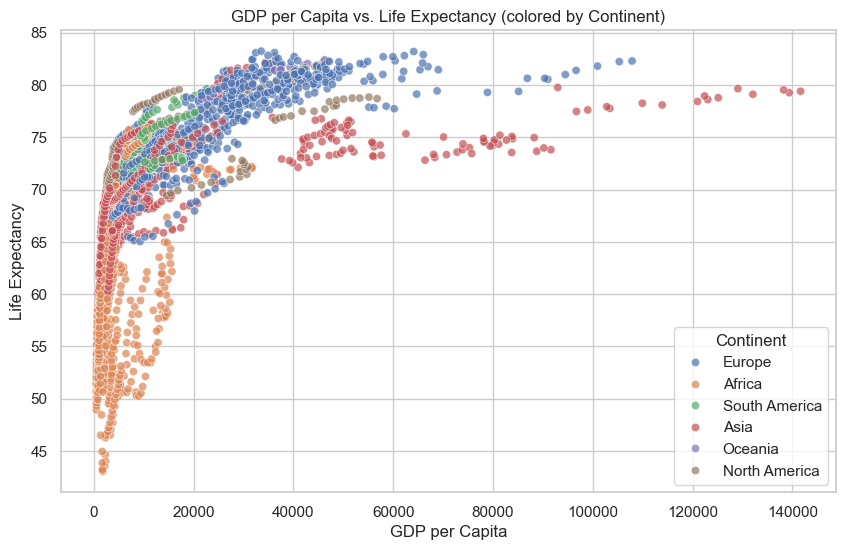

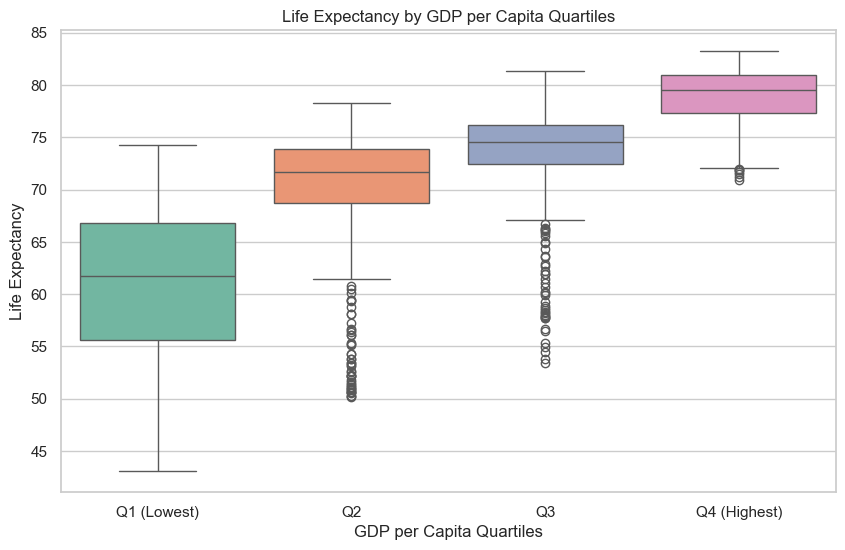

In [62]:
# Scatter plot: GDP per Capita vs. Life Expectancy, colored by Continent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP per capita', y='Life Expectancy', hue='Continent', alpha=0.7)
plt.title('GDP per Capita vs. Life Expectancy (colored by Continent)')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.legend(title='Continent')
plt.show()

# Box Plot: Life Expectancy by GDP Quartiles
df['GDP Quartile'] = pd.qcut(df['GDP per capita'], 4, labels=['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='GDP Quartile', y='Life Expectancy', palette='Set2')
plt.title('Life Expectancy by GDP per Capita Quartiles')
plt.xlabel('GDP per Capita Quartiles')
plt.ylabel('Life Expectancy')
plt.show()

**Major Takeaways (GDP vs. Life Expectancy):**
- Strong positive trend: higher GDP per capita typically aligns with higher life expectancy.
- Clear differences among continents (e.g., Europe and North America showing higher incomes and life expectancies).
- Breaking GDP into quartiles shows a notable jump in life expectancy from the lower GDP groups to higher ons.


### 2.5. Distribution of CO2 Emissions

We calculate basic statistics and plot a histogram to see how CO2 is spread across countries. 
Then we compare it to life expectancy (scatter + box plot).

Mean    Median  Standard Deviation
CO2 Emissions Summary  5.356796  3.545525            6.218898

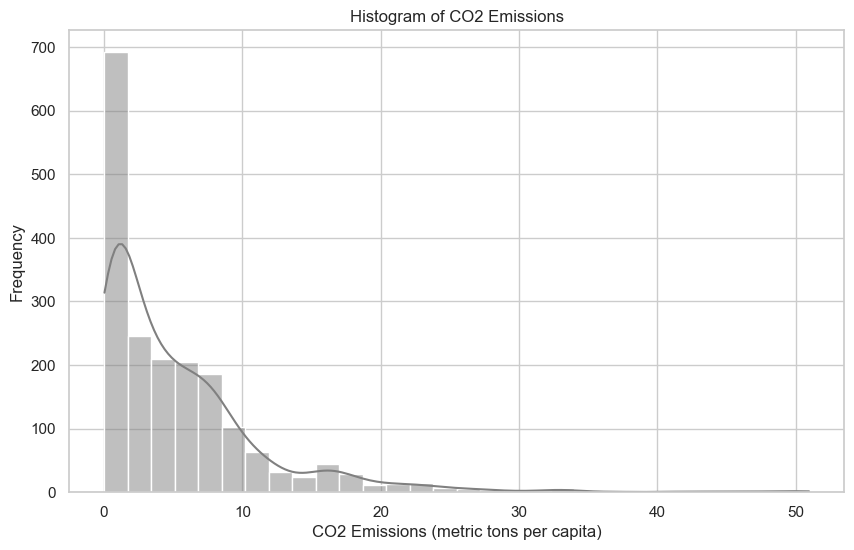

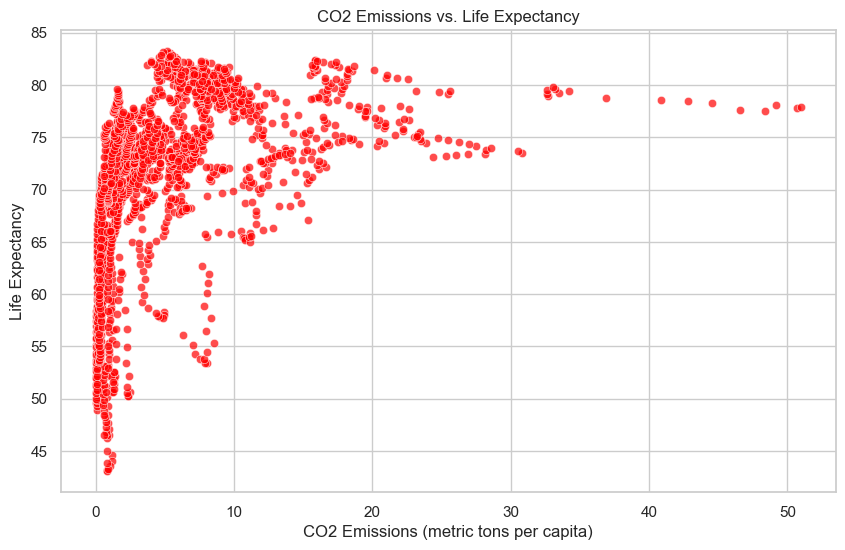

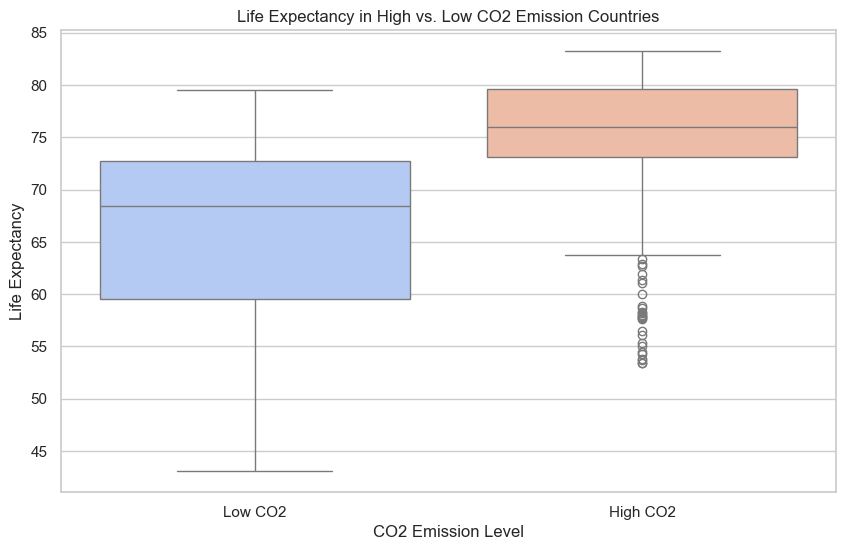

In [65]:
co2_mean = df['CO2 emissions'].mean()
co2_median = df['CO2 emissions'].median()
co2_std = df['CO2 emissions'].std()

co2_summary = {
    'Mean': co2_mean,
    'Median': co2_median,
    'Standard Deviation': co2_std
}
display(pd.DataFrame([co2_summary], index=["CO2 Emissions Summary"]))

# Histogram: CO2 Emissions
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 emissions'], bins=30, kde=True, color='gray')
plt.title('Histogram of CO2 Emissions')
plt.xlabel('CO2 Emissions (metric tons per capita)')
plt.ylabel('Frequency')
plt.show()

# Scatter: CO2 Emissions vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CO2 emissions', y='Life Expectancy', alpha=0.7, color='red')
plt.title('CO2 Emissions vs. Life Expectancy')
plt.xlabel('CO2 Emissions (metric tons per capita)')
plt.ylabel('Life Expectancy')
plt.show()

# Box Plot: High vs Low CO2
df['CO2 Level'] = pd.cut(df['CO2 emissions'], bins=[-np.inf, co2_median, np.inf], labels=['Low CO2', 'High CO2'])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CO2 Level', y='Life Expectancy', palette='coolwarm')
plt.title('Life Expectancy in High vs. Low CO2 Emission Countries')
plt.xlabel('CO2 Emission Level')
plt.ylabel('Life Expectancy')
plt.show()

**Major Takeaways (CO2 Emissions Distribution & Relationship):**
- CO2 emissions also appear right-skewed, with some countries producing high emissions.
- Positive correlation with life expectancy can emerge because higher-income countries tend to emit more CO2 but also invest in healthcare and infrastructure.

### 2.6. Electric Power Consumption

Here we analyze distribution, then see if more power consumption aligns with higher life expectancy.


In [68]:
power_mean = df['Electric power consumption'].mean()
power_median = df['Electric power consumption'].median()
power_std = df['Electric power consumption'].std()

power_summary = {
    'Mean': power_mean,
    'Median': power_median,
    'Standard Deviation': power_std
}
display(pd.DataFrame([power_summary], index=["Electric Power Consumption Summary"]))

Mean       Median  \
Electric Power Consumption Summary  3795.909462  2143.657892   

                                    Standard Deviation  
Electric Power Consumption Summary         4546.577231

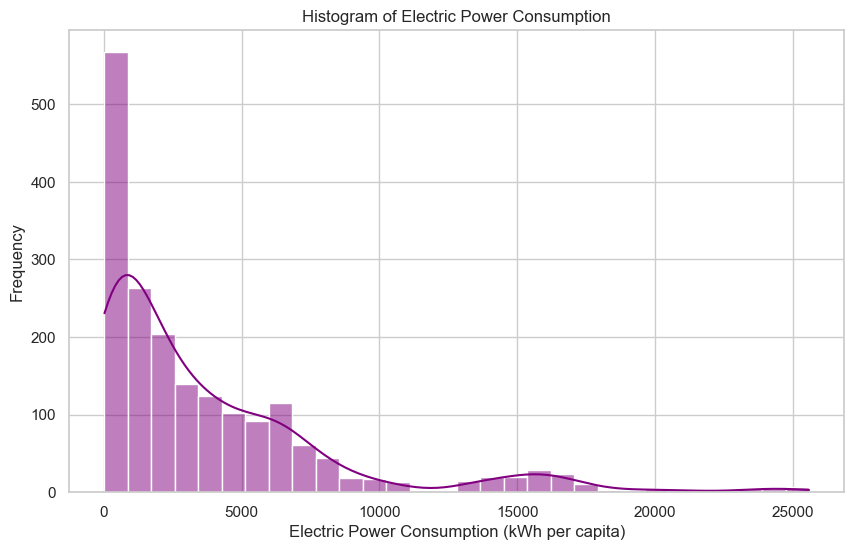

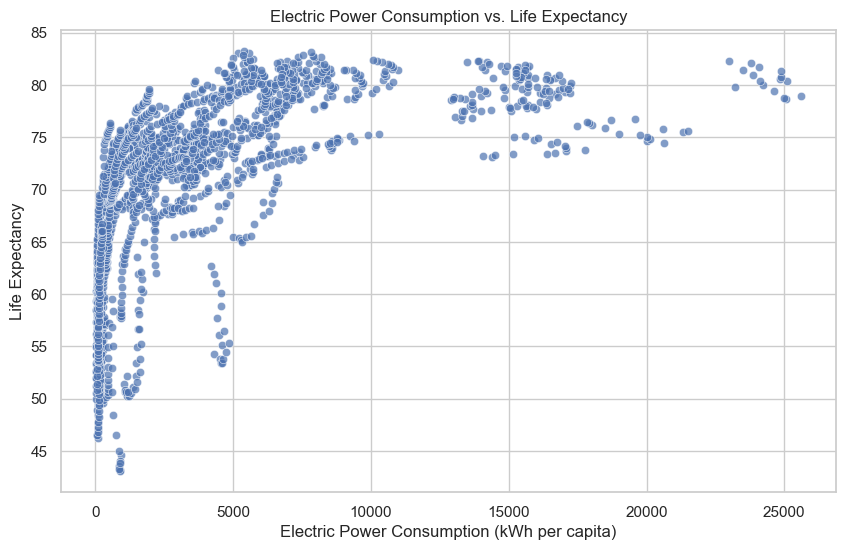

In [69]:
# Histogram of Electric Power Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric power consumption'], bins=30, kde=True, color='purple')
plt.title('Histogram of Electric Power Consumption')
plt.xlabel('Electric Power Consumption (kWh per capita)')
plt.ylabel('Frequency')
plt.show()

# Scatter: Electric Power Consumption vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electric power consumption', y='Life Expectancy', alpha=0.7)
plt.title('Electric Power Consumption vs. Life Expectancy')
plt.xlabel('Electric Power Consumption (kWh per capita)')
plt.ylabel('Life Expectancy')
plt.show()

**Major Takeaways (Electric Power Consumption):**
- Again, a skewed distribution: many countries have relatively low power consumption, a few have high.
- A moderate positive correlation with life expectancy is visible, indicating the role of infrastructure in health outcomes.

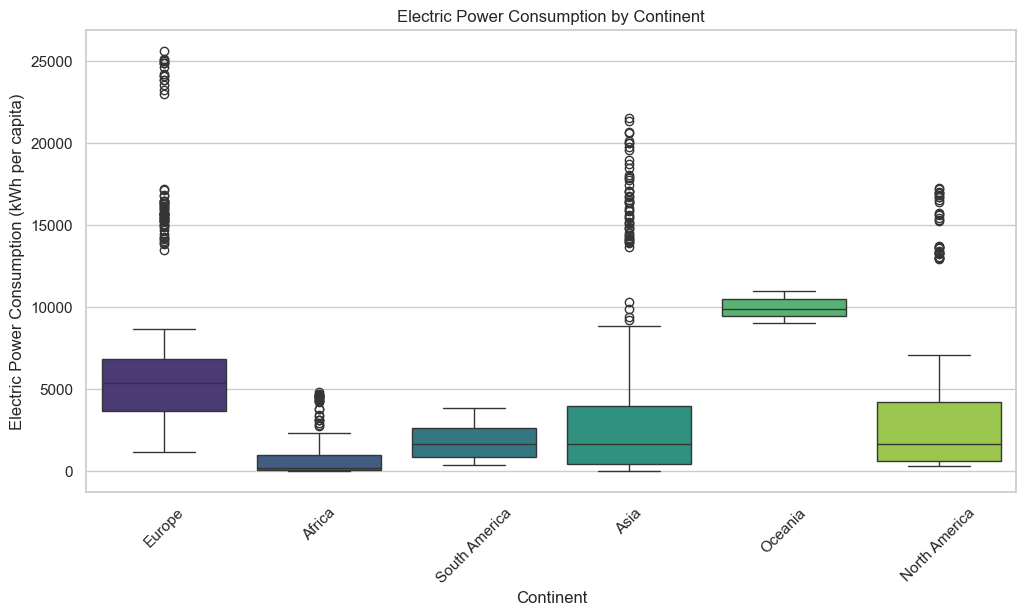

In [71]:
# Box plot: Electric Power Consumption by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Continent', y='Electric power consumption', palette='viridis')
plt.title('Electric Power Consumption by Continent')
plt.xlabel('Continent')
plt.ylabel('Electric Power Consumption (kWh per capita)')
plt.xticks(rotation=45)
plt.show()

**Major Takeaways (Power Consumption by Continent):**
- North America and Europe typically show higher power consumption, aligned with more developed industrial infrastructure.
- Africa and parts of Asia show lower average consumption, reflecting differences in developmen.


### 2.7. Forest Area Analysis

Next, we look at the forest area percentage, plot a histogram, scatter, and compare 
life expectancy in countries with high vs. low forest coverae.


In [74]:
power_mean = df['Electric power consumption'].mean()
power_median = df['Electric power consumption'].median()
power_std = df['Electric power consumption'].std()

power_summary = {
    'Mean': power_mean,
    'Median': power_median,
    'Standard Deviation': power_std
}

pd.DataFrame([power_summary], index=["Electric Power Consumption Summary"])

Mean       Median  \
Electric Power Consumption Summary  3795.909462  2143.657892   

                                    Standard Deviation  
Electric Power Consumption Summary         4546.577231

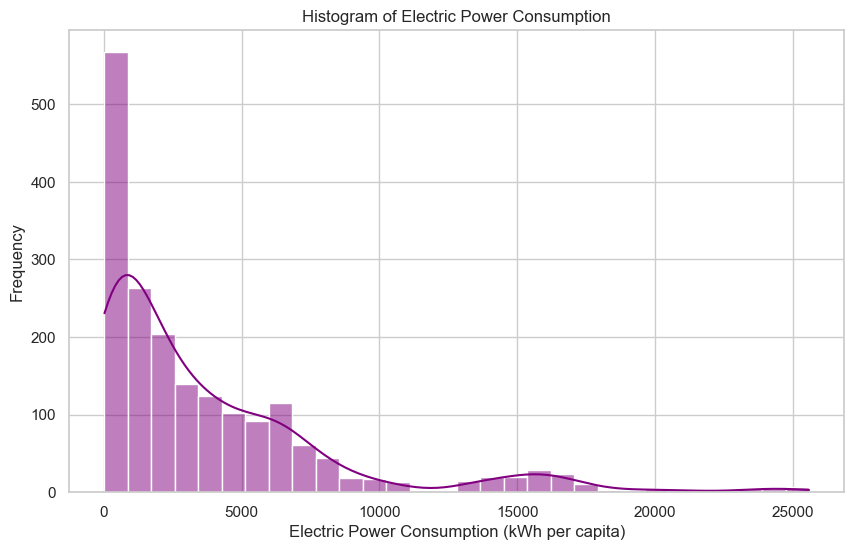

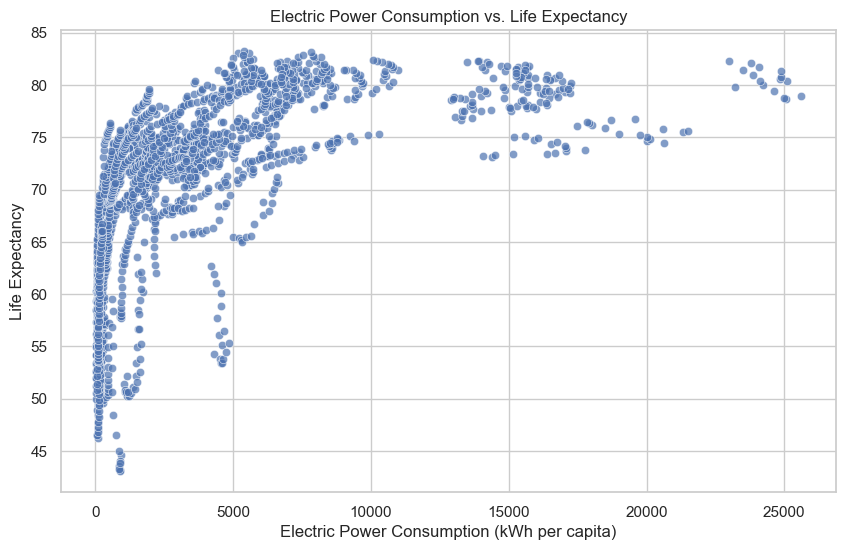

In [75]:
# Histogram of Electric Power Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric power consumption'], bins=30, kde=True, color='purple')
plt.title('Histogram of Electric Power Consumption')
plt.xlabel('Electric Power Consumption (kWh per capita)')
plt.ylabel('Frequency')
plt.show()

# Scatter: Electric Power Consumption vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Electric power consumption', y='Life Expectancy', alpha=0.7)
plt.title('Electric Power Consumption vs. Life Expectancy')
plt.xlabel('Electric Power Consumption (kWh per capita)')
plt.ylabel('Life Expectancy')
plt.show()

**Major Takeaways (Electric Power Consumption):**
- Again, a skewed distribution: many countries have relatively low power consumption, a few have high.
- A moderate positive correlation with life expectancy is visible, indicating the role of infrastructure in health outcome.
.


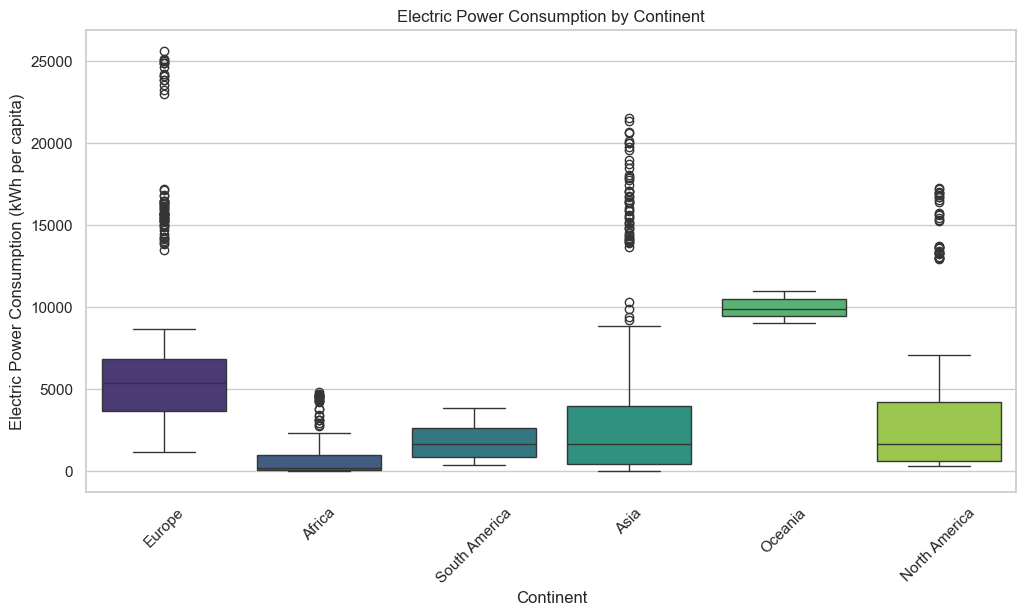

In [77]:
# Box plot: Electric Power Consumption by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Continent', y='Electric power consumption', palette='viridis')
plt.title('Electric Power Consumption by Continent')
plt.xlabel('Continent')
plt.ylabel('Electric Power Consumption (kWh per capita)')
plt.xticks(rotation=45)
plt.show()

**Major Takeaways (Power Consumption by Continent):**
- North America and Europe typically show higher power consumption, aligned with more developed industrial infrastructure.
- Africa and parts of Asia show lower average consumption, reflecting differences in development.|

### 2.8. Forest Area Analysis

Next, we look at the forest area percentage, plot a histogram, scatter, and compare 
life expectancy in countries with high vs. low forest coverae.


In [80]:
forest_mean = df['Forest area'].mean()
forest_median = df['Forest area'].median()
forest_std = df['Forest area'].std()

forest_summary = {
    'Mean': forest_mean,
    'Median': forest_median,
    'Standard Deviation': forest_std
}

pd.DataFrame([forest_summary], index=["Forest Area Percentage Summary"])

Mean     Median  Standard Deviation
Forest Area Percentage Summary  30.547158  30.888136           20.855899

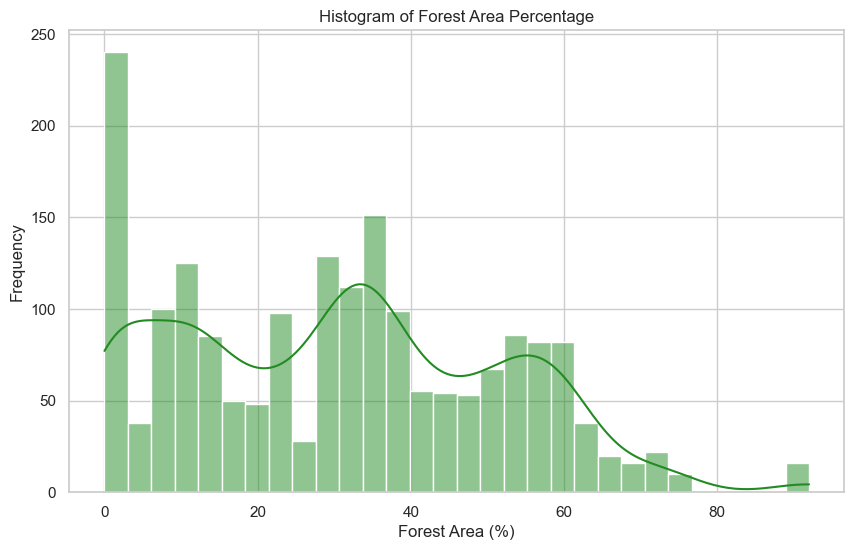

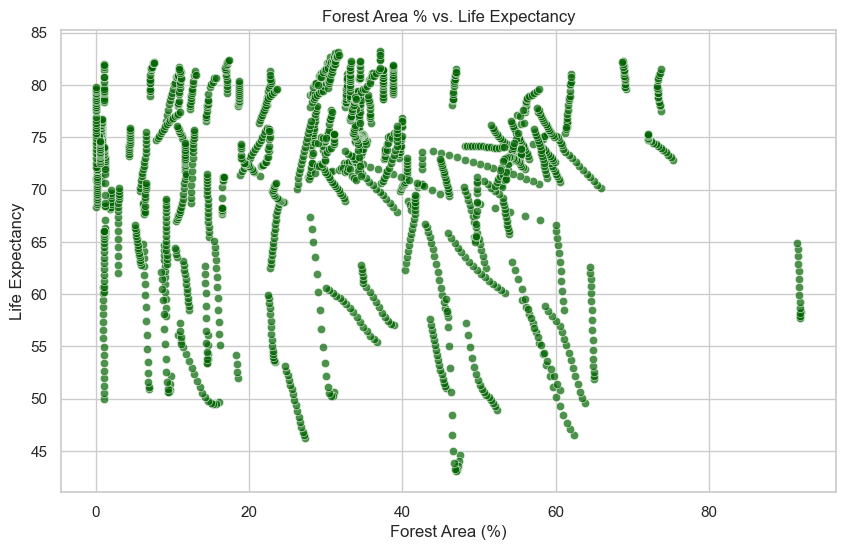

In [81]:
# Histogram of Forest Area
plt.figure(figsize=(10, 6))
sns.histplot(df['Forest area'], bins=30, kde=True, color='forestgreen')
plt.title('Histogram of Forest Area Percentage')
plt.xlabel('Forest Area (%)')
plt.ylabel('Frequency')
plt.show()

# Scatter: Forest Area vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Forest area', y='Life Expectancy', alpha=0.7, color='darkgreen')
plt.title('Forest Area % vs. Life Expectancy')
plt.xlabel('Forest Area (%)')
plt.ylabel('Life Expectancy')
plt.show()

**Major Takeaways (Forest Area Distribution & Relationship):**
- Forest area percentages vary widely; some countries have very high forest coverage, others very little.
- There's no strong correlation with life expectancy in this datase.


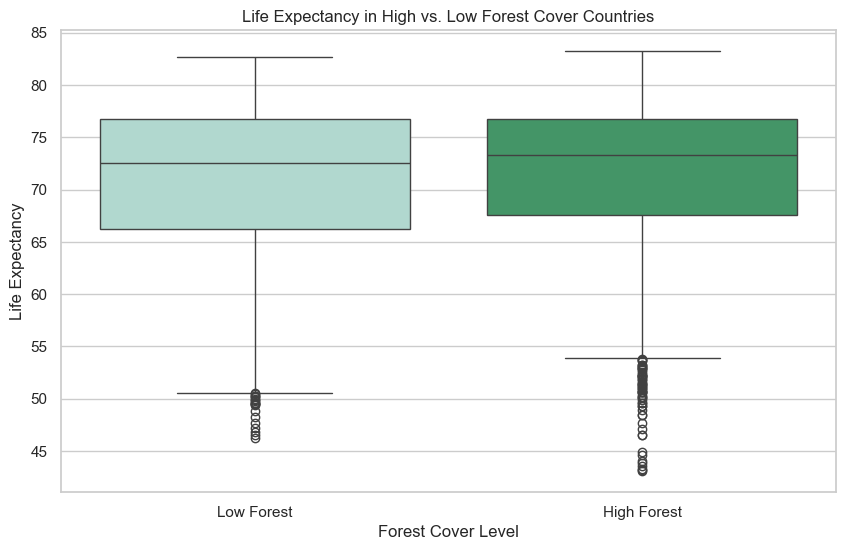

In [83]:
# Box plot: Life Expectancy for High vs. Low Forest Cover
forest_median_val = df['Forest area'].median()
df['Forest Cover Level'] = pd.cut(df['Forest area'],
                                  bins=[-np.inf, forest_median_val, np.inf],
                                  labels=['Low Forest', 'High Forest'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Forest Cover Level', y='Life Expectancy', palette='BuGn')
plt.title('Life Expectancy in High vs. Low Forest Cover Countries')
plt.xlabel('Forest Cover Level')
plt.ylabel('Life Expectancy')
plt.show()

**Major Takeaways (Forest Cover Box Plot):**
- The median-split box plot suggests no significant difference in life expectancy between high vs. low forest coverage groups.

### 2.9. Internet Usage vs. Life Expectancy

**Question**: Do countries with higher internet penetration tend to have higher life expectancy?

Steps:
1. Show summary statistics of internet usage.
2. Plot histogram, scatter, and box plot by continent.
3. Discuss any visible patterns.

Summary Stats: Individuals using the Internet (%)
count    1904.000000
mean       29.736220
std        27.773360
min         0.000168
25%         5.000000
50%        20.000000
75%        51.824997
max        96.810326
Name: Individuals using the Internet, dtype: float64 



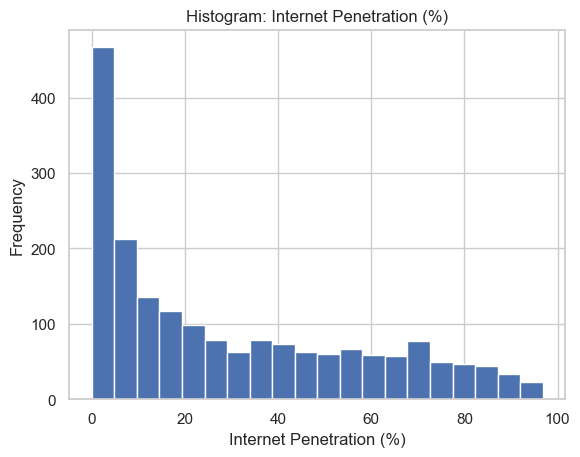

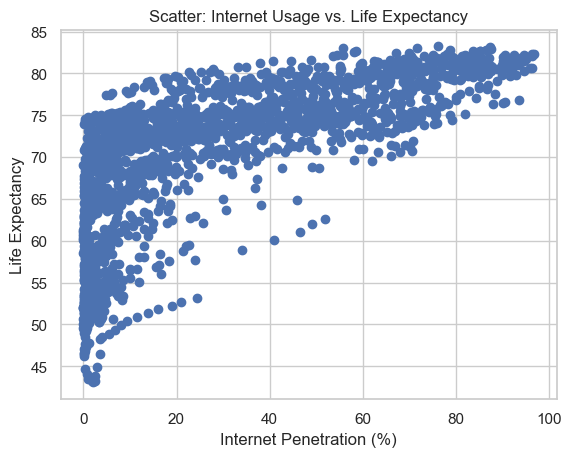

<Figure size 640x480 with 0 Axes>

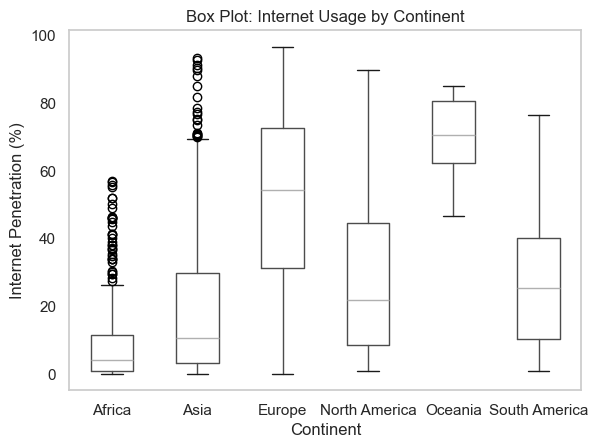

In [86]:
import pandas as pd

df_filtered = pd.read_csv('life.csv', delimiter=";")

import matplotlib.pyplot as plt

# --- 2.1a. Summary Stats: Internet usage distribution ---
internet_desc = df_filtered["Individuals using the Internet"].describe()
print("Summary Stats: Individuals using the Internet (%)")
print(internet_desc, "\n")

# --- 2.1b. Histogram of Internet Usage ---
plt.figure()
plt.hist(df_filtered["Individuals using the Internet"].dropna(), bins=20)
plt.title("Histogram: Internet Penetration (%)")
plt.xlabel("Internet Penetration (%)")
plt.ylabel("Frequency")
plt.show()

# --- 2.1c. Scatter plot: Internet vs. Life Expectancy ---
plt.figure()
plt.scatter(df_filtered["Individuals using the Internet"], df_filtered["Life Expectancy"])
plt.title("Scatter: Internet Usage vs. Life Expectancy")
plt.xlabel("Internet Penetration (%)")
plt.ylabel("Life Expectancy")
plt.show()

# --- 2.1d. Box plot by Continent ---
plt.figure()
df_filtered.boxplot(column="Individuals using the Internet", by="Continent", grid=False)
plt.title("Box Plot: Internet Usage by Continent")
plt.suptitle("")
plt.xlabel("Continent")
plt.ylabel("Internet Penetration (%)")
plt.show()

**Major Takeaways**

1. **Internet Usage Distribution**: The summary stats reveal that internet penetration varies widely, from near-zero to almost full coverage in some countries.
2. **Positive Visual Correlation**: The scatter plot suggests a notable positive relationship between internet usage and life expectancy. Higher internet penetration often aligns with higher life expectancy.
3. **Regional Differences**: The box plot shows that continents differ significantly; for example, Europe and North America tend to have higher median internet usage, whereas others, like Africa, have lower median usage.

### 2.10. Comparing Life Expectancy: Least Developed vs. Developed

We compare life expectancy for countries categorized as "Least Developed" (`True`) vs. the rest (`False`).

Life Expectancy by Development Status:


mean     median  count
Least Developed                             
False            72.640380  73.909817   1648
True             59.081543  59.319500    256

<Figure size 640x480 with 0 Axes>

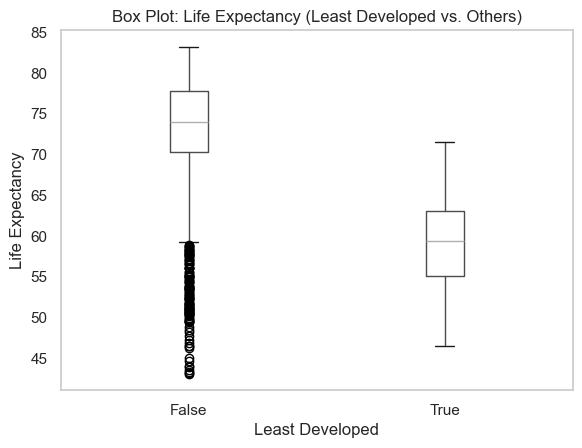

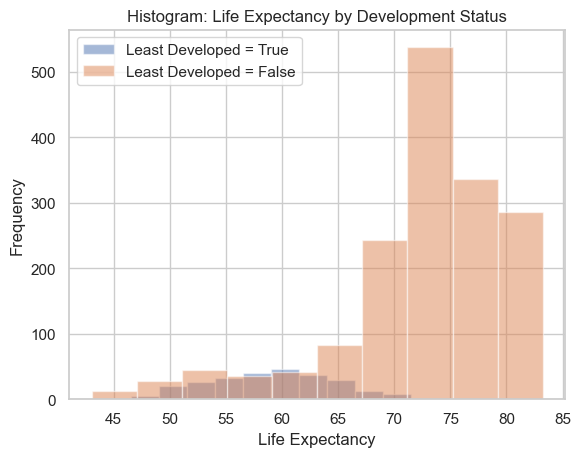

In [89]:
# Mean & median life expectancy by development status
dev_stats = df_filtered.groupby("Least Developed")["Life Expectancy"].agg(["mean", "median", "count"])
print("Life Expectancy by Development Status:")
display(dev_stats)

# Box Plot
plt.figure()
df_filtered.boxplot(column="Life Expectancy", by="Least Developed", grid=False)
plt.title("Box Plot: Life Expectancy (Least Developed vs. Others)")
plt.suptitle("")
plt.xlabel("Least Developed")
plt.ylabel("Life Expectancy")
plt.show()

# Histogram comparison
ldc_true = df_filtered[df_filtered["Least Developed"] == True]["Life Expectancy"]
ldc_false = df_filtered[df_filtered["Least Developed"] == False]["Life Expectancy"]

plt.figure()
plt.hist(ldc_true, alpha=0.5, label="Least Developed = True")
plt.hist(ldc_false, alpha=0.5, label="Least Developed = False")
plt.title("Histogram: Life Expectancy by Development Status")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Major Takeaways**

1. **Lower Averages in LDCs**: The mean life expectancy in Least Developed countries is significantly lower (about 59 years) compared to non-LDCs (~73 years).
2. **Distribution Contrast**: The box plot and histogram confirm that the "Least Developed" group is skewed toward lower life expectancy, reflecting disparities in healthcare, nutrition, and infrastructure.
3. **Policy Implications**: Improving health systems, education, and economic conditions in Least Developed countries could help close this gap.

### 2.11. Military Expenditure vs. Life Expectancy

Summary Stats: Military Expenditure
count    1904.000000
mean        2.206872
std         2.969809
min         0.000000
25%         1.087925
50%         1.532535
75%         2.414676
max        32.655671
Name: Military expenditure, dtype: float64 



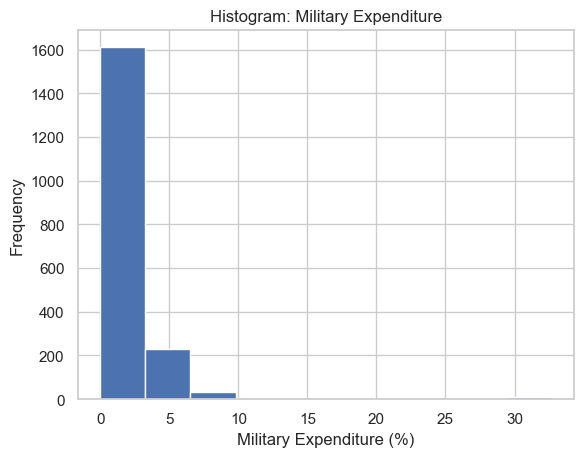

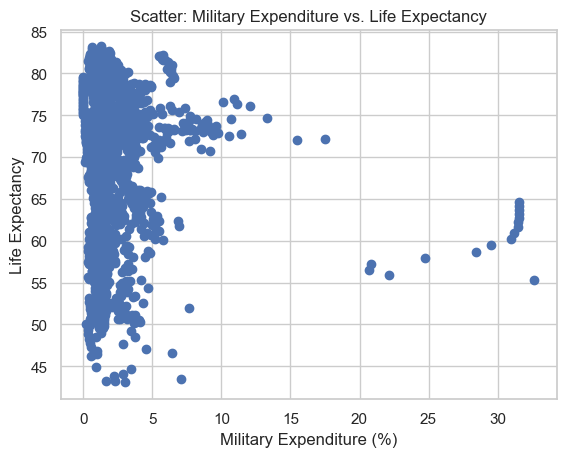

<Figure size 640x480 with 0 Axes>

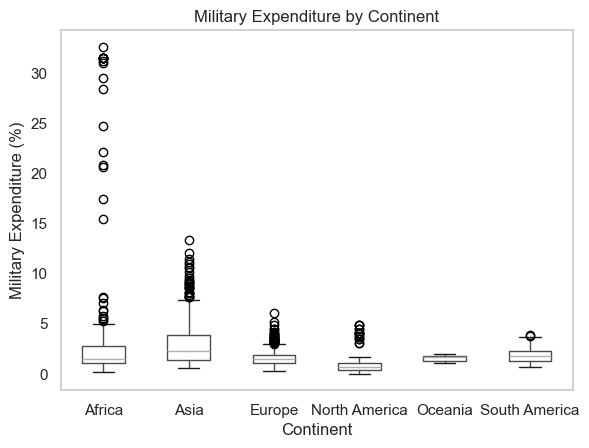

In [92]:
# Summary stats: military expenditure
mil_exp_desc = df_filtered["Military expenditure"].describe()
print("Summary Stats: Military Expenditure")
print(mil_exp_desc, "\n")

# Histogram
plt.figure()
plt.hist(df_filtered["Military expenditure"].dropna())
plt.title("Histogram: Military Expenditure")
plt.xlabel("Military Expenditure (%)")
plt.ylabel("Frequency")
plt.show()

# Scatter: Military vs. Life Expectancy
plt.figure()
plt.scatter(df_filtered["Military expenditure"], df_filtered["Life Expectancy"])
plt.title("Scatter: Military Expenditure vs. Life Expectancy")
plt.xlabel("Military Expenditure (%)")
plt.ylabel("Life Expectancy")
plt.show()

# Box plot: Military Expenditure by Continent
plt.figure()
df_filtered.boxplot(column="Military expenditure", by="Continent", grid=False)
plt.title("Military Expenditure by Continent")
plt.suptitle("")
plt.xlabel("Continent")
plt.ylabel("Military Expenditure (%)")
plt.show()

**Major Takeaways**

1. **Wide Variation**: Military expenditure ranges from near 0% to over 30% of GDP in some cases, suggesting very different defense/spending priorities worldwide.
2. **No Clear Pattern**: The scatter plot does not show a strong linear relationship; countries with high military spending can appear at any range of life expectancy.
3. **Continent Differences**: Some regions (e.g., Middle East or North Africa) might have higher median expenditures than others, though it's not universally uniform.

### 2.12 Beer Consumption vs. Life Expectancy

Summary Stats: Beer Consumption per Capita
count    1904.000000
mean        2.199408
std         1.903435
min         0.000000
25%         0.484170
50%         1.791200
75%         3.720080
max         7.877850
Name: Beer consumption per capita, dtype: float64 



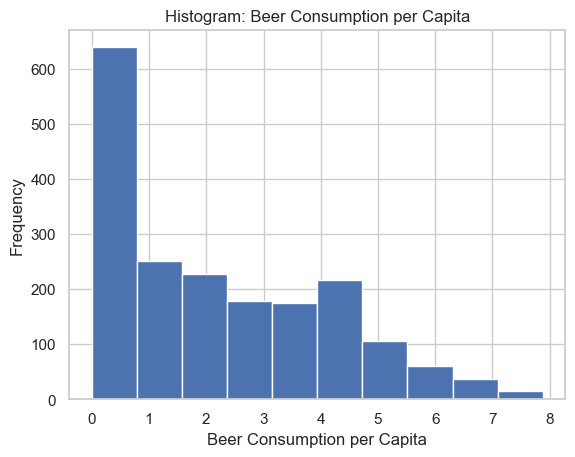

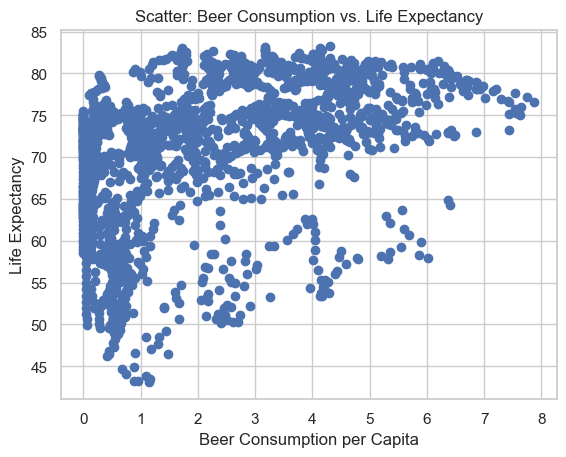

<Figure size 640x480 with 0 Axes>

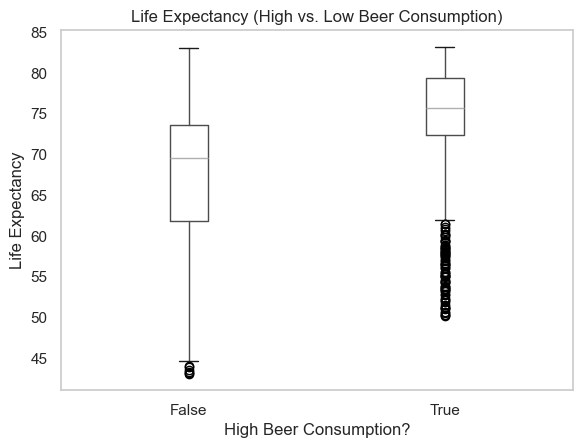

In [95]:
# Summary stats: beer consumption
beer_stats = df_filtered["Beer consumption per capita"].describe()
print("Summary Stats: Beer Consumption per Capita")
print(beer_stats, "\n")

# Histogram
plt.figure()
plt.hist(df_filtered["Beer consumption per capita"].dropna())
plt.title("Histogram: Beer Consumption per Capita")
plt.xlabel("Beer Consumption per Capita")
plt.ylabel("Frequency")
plt.show()

# Scatter: Beer Consumption vs. Life Expectancy
plt.figure()
plt.scatter(df_filtered["Beer consumption per capita"], df_filtered["Life Expectancy"])
plt.title("Scatter: Beer Consumption vs. Life Expectancy")
plt.xlabel("Beer Consumption per Capita")
plt.ylabel("Life Expectancy")
plt.show()

# Box plot: High vs. Low Beer
beer_median = df_filtered["Beer consumption per capita"].median()
df_filtered["Beer_Consumption_Category"] = df_filtered["Beer consumption per capita"] > beer_median

plt.figure()
df_filtered.boxplot(column="Life Expectancy", by="Beer_Consumption_Category", grid=False)
plt.title("Life Expectancy (High vs. Low Beer Consumption)")
plt.suptitle("")
plt.xlabel("High Beer Consumption?")
plt.ylabel("Life Expectancy")
plt.show()

**Major Takeaways**

1. **Moderate Mean Consumption**: Mean beer consumption is around 2 liters per capita (or the dataset's specific measure), with a wide range from near zero to ~8 liters.
2. **Slight Positive Relationship?**: The scatter suggests countries with higher beer consumption might have higher life expectancy on average, though this could be influenced by overall wealth or cultural habits rather than beer alone.
3. **Group Comparison**: Splitting into high vs. low beer consumption shows a noticeable difference in the median life expectancy, hinting at a possible association (though confounding factors abound).

### 2.13. Changes Over Time

We now observe whether life expectancy has improved between 2000 and 2015, and whether 
certain continents have seen more dramatic improvements than others.

Mean Yearly Life Expectancy (All Countries):
 Year
2000    68.436453
2001    68.712396
2002    68.938217
2003    69.194394
2004    69.565919
2005    69.839951
2006    70.186741
2007    70.521125
2008    70.915502
2009    71.314385
2010    71.699719
2011    72.112491
2012    72.427546
2013    72.789492
2014    73.116292
2015    73.306871
Name: Life Expectancy, dtype: float64 

Summary of Yearly Change in Life Expectancy:
 count    15.000000
mean      0.324695
std       0.067324
min       0.190579
25%       0.274988
50%       0.334383
75%       0.378429
max       0.412772
Name: Life Expectancy, dtype: float64 



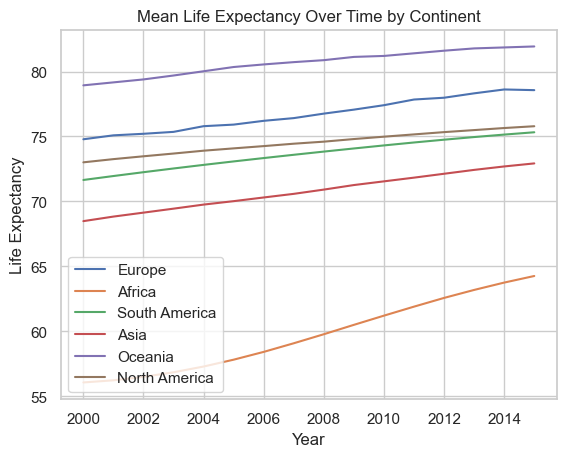

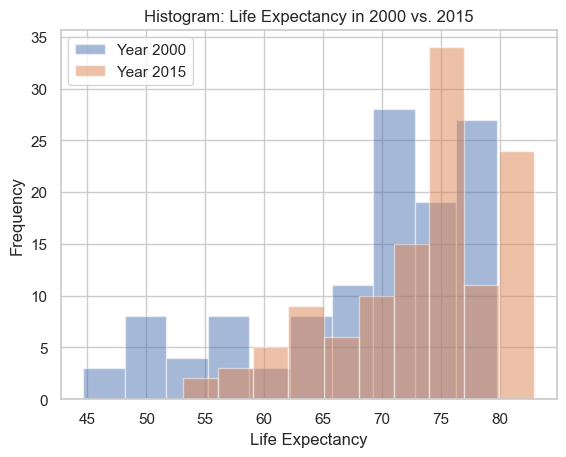

In [98]:
# Mean life expectancy by year
yearly_le = df_filtered.groupby("Year")["Life Expectancy"].mean()
yearly_change = yearly_le.diff().describe()

print("Mean Yearly Life Expectancy (All Countries):\n", yearly_le, "\n")
print("Summary of Yearly Change in Life Expectancy:\n", yearly_change, "\n")

# Line plot by continent
continents = df_filtered["Continent"].unique()

plt.figure()
for c in continents:
    subset = df_filtered[df_filtered["Continent"] == c]
    mean_le = subset.groupby("Year")["Life Expectancy"].mean()
    plt.plot(mean_le.index, mean_le.values, label=c)

plt.title("Mean Life Expectancy Over Time by Continent")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()

# Compare 2000 vs. 2015
le_2000 = df_filtered[df_filtered["Year"] == 2000]["Life Expectancy"]
le_2015 = df_filtered[df_filtered["Year"] == 2015]["Life Expectancy"]

plt.figure()
plt.hist(le_2000.dropna(), alpha=0.5, label="Year 2000")
plt.hist(le_2015.dropna(), alpha=0.5, label="Year 2015")
plt.title("Histogram: Life Expectancy in 2000 vs. 2015")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Major Takeaways**

1. **Overall Increases**: Average life expectancy rose globally from ~68.4 (2000) to ~73.3 (2015), indicating a meaningful improvement.
2. **Continental Variation**: Some continents (e.g., Africa) show lower absolute values, but the slope of improvement may differ from region to region.
3. **Distributions Shift**: Comparing histograms for 2000 vs. 2015 reveals that many countries moved toward higher life expectancy over time, though certain nations still lag.

## 3. Statistical Testing

### 3.1. How does health expenditure relate to life expectancy?

In [102]:
from scipy import stats

columns_needed = ["Health expenditure", "Life Expectancy"]
data_clean = data[columns_needed].dropna()

pearson_corr, pearson_p = stats.pearsonr(data_clean["Health expenditure"], data_clean["Life Expectancy"])
spearman_corr, spearman_p = stats.spearmanr(data_clean["Health expenditure"], data_clean["Life Expectancy"])


median_expenditure = data_clean["Health expenditure"].median()
high_expenditure = data_clean[data_clean["Health expenditure"] > median_expenditure]["Life Expectancy"]
low_expenditure = data_clean[data_clean["Health expenditure"] <= median_expenditure]["Life Expectancy"]

t_stat, t_p_value = stats.ttest_ind(high_expenditure, low_expenditure, equal_var=False)

data_clean["Expenditure Category"] = pd.qcut(data_clean["Health expenditure"], q=3, labels=["Low", "Medium", "High"])
anova_groups = [group["Life Expectancy"].values for _, group in data_clean.groupby("Expenditure Category")]
anova_stat, anova_p_value = stats.f_oneway(*anova_groups)

mu_hat = np.mean(data_clean["Life Expectancy"])
sigma_hat = np.std(data_clean["Life Expectancy"], ddof=1)

ks_stat, ks_p_value = stats.ks_2samp(high_expenditure, low_expenditure)

ks_results = {
    "KS Statistic": ks_stat,
    "P-Value": ks_p_value
}

results = {
    "Pearson Correlation": [pearson_corr],
    "Pearson P-Value": [pearson_p],
    "Spearman Correlation": [spearman_corr],
    "Spearman P-Value": [spearman_p],
    "T-Test Statistic": [t_stat],
    "T-Test P-Value": [t_p_value],
    "KS Statistic": [ks_stat],
    "KS P-Value": [ks_p_value],
    "ANOVA Statistic": [anova_stat],
    "ANOVA P-Value": [anova_p_value]
}

results = pd.DataFrame.from_dict(results)
results = results.T
results.columns = ["P-Value"]
results

P-Value
Pearson Correlation    4.706763e-01
Pearson P-Value       1.433788e-105
Spearman Correlation   5.633634e-01
Spearman P-Value      6.550490e-160
T-Test Statistic       2.146743e+01
T-Test P-Value         1.162846e-91
KS Statistic           4.779412e-01
KS P-Value             8.773010e-99
ANOVA Statistic        2.586720e+02
ANOVA P-Value         4.350906e-100

#### Why these tests?

In order to make the concrete statement that healthcare spending leads to a longer life expectancy, we need to conduct a line of statistical testing.

>**Pearson / Spearman Correlation**:
>
>**Why?** These tests help us really quantify the strength and direction of the relationship between health spending and life expectancy.The Pearson correlation assumes a linear relationship and measures how strongly the two variables move together. This will tell us if there seems to be a good linear relationship between the two variables. The Spearman correlation works by being a rank-based test, which is useful when the relationship might be nonlinear but still monotonic (increasing). Between these two tests we can conclude if there is some sort of relationship present between healthcare spend and life expectancy.
>
>**Good Choice?** These tests are ideal for quickly assessing whether increasing healthcare spending is in general associated with a higher life expectancy.

>**Independent T-Test (High vs. Low Health Expenditure)**:
>
> **Why?** The T-test here is used to compare the mean life expectancy between two groups. The first group: countries with high health expenditure vs. the second group: countries with low health expenditure.
>
>**Good Choice?** This test helps us determine whether countries that invest more in healthcare budgets have a statistically significant advantage in life expectancy over those that invest just don't invest as much.

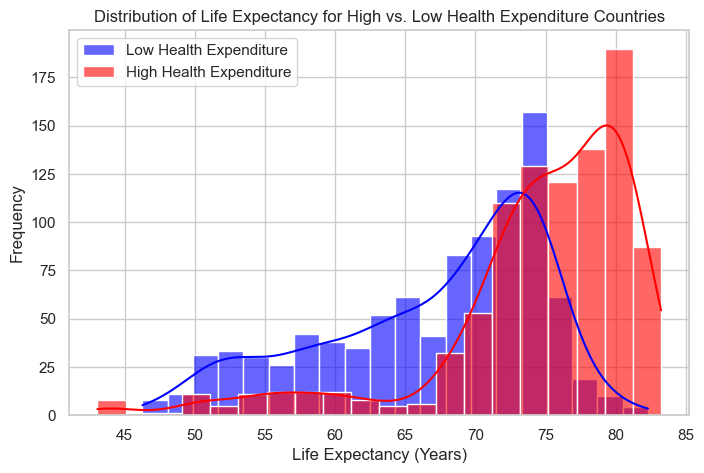

In [104]:
plt.figure(figsize=(8, 5))

sns.histplot(low_expenditure, bins=20, kde=True, color='blue', label='Low Health Expenditure', alpha=0.6)
sns.histplot(high_expenditure, bins=20, kde=True, color='red', label='High Health Expenditure', alpha=0.6)

plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy for High vs. Low Health Expenditure Countries")
plt.legend()

plt.show()

In [105]:
shapiro_low = stats.shapiro(low_expenditure)
shapiro_high = stats.shapiro(high_expenditure)

shapiro_results = {
    "Shapiro-Wilk Test (Low Health Expenditure)": {
        "W Statistic": shapiro_low.statistic,
        "P-Value": shapiro_low.pvalue
    },
    "Shapiro-Wilk Test (High Health Expenditure)": {
        "W Statistic": shapiro_high.statistic,
        "P-Value": shapiro_high.pvalue
    }
}

shapiro_results = pd.DataFrame.from_dict(shapiro_results)
shapiro_results

Shapiro-Wilk Test (Low Health Expenditure)  \
W Statistic                                9.263020e-01   
P-Value                                    3.387075e-21   

             Shapiro-Wilk Test (High Health Expenditure)  
W Statistic                                 8.077698e-01  
P-Value                                     3.675119e-32

>**The KS Test**: 
>
>**Why?** Though we got significant results from our T-test, we can clearly see that our data is not normal, and we confirmed this by getting a low P value on the Shapiro-Wilk test above. One of the key assumptions of the T-test is normallity. If can't assume that then logically the nest step would be to switch to a non-parametric test. Our distributions have similar shapes and reasonably overlap. Therefore, we should try the KS-test and see what kind of results we get.
>
>**Good Choice?**: The KS test looks at the distribution as a whole not just the means. This means our result here is more indicative of the distribution as a whole.

>**ANOVA (Analysis of Variance)**:
>
>**Why?** The ANOVA is an extention of the T-test by comparing life expectancy across multiple health expenditure groups namely low, medium, and high spending groups. This helps us get a better idea of how spending differs accross groups.
>
>**Good Choice?** If healthcare spending follows a tiered impact (differences between high/medium/low) rather than a simple high-low division, ANOVA helps uncover statistically significant differences across multiple spend levels.

#### Conclusions

Using the results of the tests above, we can say that the distributions of high and low healthcare spending countries is different significantly per the KS test. Furthermore, we can also say that there is a sort of relationship to be had here per the correlation tests that we did. Although the moderate values indicate that this relationship is not necessarily fully linear. Finally, our ANOVA showcases that life expectancy varied signiciantly across different healthcare spending groups. Thus reinforcing the fact that healthcare investment significantly influences longevity.

### 3.2. Is there a relationship between access to clean drinking water and life expectancy?

To examine the relationship between the access to clean drinking water of a country and its life expectancy, we need to ensure our statistical methods are appropriate given the data distribution (by checking assumptions).  Below, we describe the justification for each test and how it contributes to our understanding.

#### What tests do we want to conduct

>**Spearman Correlation**: To check for association between water access and life expectancy. This will allow us to understand if the two are related and then assess if we want to use as a feature in our final model.

>**Independent T-test or Mann Whittney U**: Compare life expectancy between countries with high amounts of water access to low amounts of water access. Ultimately we want to see if water access creates a significant difference in life expectancy between countries that have it and countries that don't. This test will allow us to do this. 

>**Chi-Squared Test for Independence**: Check for independence between basic drinking water access and Least Developed status. We want to try and avoid creating multicollinearity in our final model. We have a hunch that water access has a lot to do with whether or not a country is developed or not. In this test we will test that hunch.

#### Assumptions

Before we conduct any statistical testing, we need to make sure that assumptions needed for these tests are met. 

>**Assumption #1**: Normality (for T-test)
>
> The T-test assumes that life expectancy is normally distributed within each group. To check this assumption we implemented the Shapiro-Wilk test 
>
> Our Shaprio-Wilk test found a p-value < 0.05 indicating that our data is not normally distributed. Thus, this assumption is violated, and we might need to try a non-parametric test.

In [113]:
data_clean = data[["People using at least basic drinking water services", "Life Expectancy", "Least Developed"]].dropna()
median_water_access = data_clean["People using at least basic drinking water services"].median()
high_water_access = data_clean[data_clean["People using at least basic drinking water services"] > median_water_access]["Life Expectancy"]
low_water_access = data_clean[data_clean["People using at least basic drinking water services"] <= median_water_access]["Life Expectancy"]

In [114]:
shapiro_water = stats.shapiro(data_clean["People using at least basic drinking water services"])

print("Shapiro-Wilk Test for Normality (Drinking Water Access):")
print(f"W Statistic: {shapiro_water.statistic}, P-Value: {shapiro_water.pvalue}")

Shapiro-Wilk Test for Normality (Drinking Water Access):
W Statistic: 0.7540217706437369, P-Value: 1.121712274875562e-46


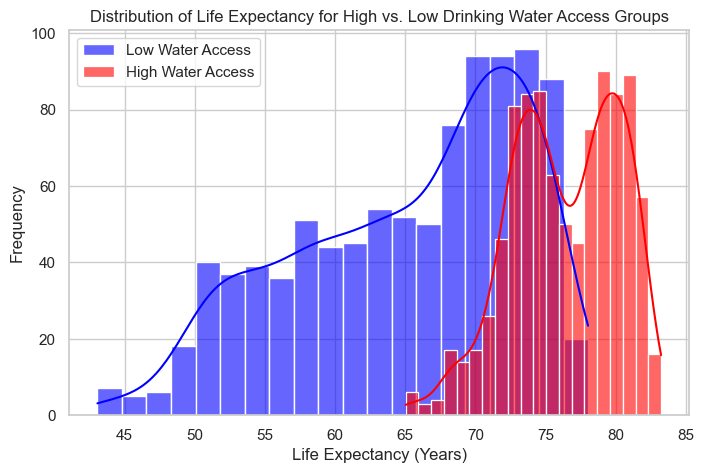

In [115]:
plt.figure(figsize=(8, 5))

sns.histplot(low_water_access, bins=20, kde=True, color='blue', label='Low Water Access', alpha=0.6)
sns.histplot(high_water_access, bins=20, kde=True, color='red', label='High Water Access', alpha=0.6)

plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Life Expectancy for High vs. Low Drinking Water Access Groups")
plt.legend()

plt.show()

>**Assumption #2**: Independence (T-test and Chi-Squared test):
>
> The T-test assumes that the two groups are independent (high/low water). The Chi-Squared test assumes that the observations are independent (i.e. one country being labelled Least Developed does not affect another). 
>
> There are two ways of looking at this. One way in which we say all data points are separate, and thus the assumption of independence is met, or another way in which we say regionality of countries would naturally affect other countries within groups meaning the data is not independant. However, for the sake of this analysis we will say that since we have global and diverse data, the effect might not be large enough to invalidate our findings.

>**Assumption #3**: Homogenity of Variance (T-Test): 
>
> Assumes that the variance is about equal between the two groups. We can check this using the Lavene test or using histograms. Since the Normality assumption is already violated though, we will elect to use a non-parametric test either way. In this case that will be the Mann Whitney U test so that we can essentially compare medians of two groups.

>**Assumption #4**: Ordinal Relationship (Spearman Correlation)
>
>Assumes that there is a monotonic relationship present between clean water access and life expectancy, meaning as water access increases so should life expectancy

#### Running the Statistic Tests

In [118]:
spearman_corr, spearman_p = stats.spearmanr(
    data_clean["People using at least basic drinking water services"],
    data_clean["Life Expectancy"]
)

t_stat_water, t_p_value_water = stats.ttest_ind(high_water_access, low_water_access, equal_var=False)

mannwhitney_stat, mannwhitney_p = stats.mannwhitneyu(high_water_access, low_water_access, alternative="greater")

data_clean["High Water Access"] = data_clean["People using at least basic drinking water services"] > median_water_access
contingency_table = pd.crosstab(data_clean["High Water Access"], data_clean["Least Developed"])
chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency_table)

results_water_tests = {
    "Test": ["Spearman Correlation", "T-Test (High vs. Low Drinking Water Access)", "Mann-Whitney U Test", "Chi-Square Test (Water Access vs. Least Developed Status)"],
    "Statistic": [spearman_corr, t_stat_water, mannwhitney_stat, chi2_stat],
    "P-Value": [spearman_p, t_p_value_water, mannwhitney_p, chi2_p]
}

results_df = pd.DataFrame(results_water_tests)
results_df

Test      Statistic  \
0                               Spearman Correlation       0.844428   
1        T-Test (High vs. Low Drinking Water Access)      37.947477   
2                                Mann-Whitney U Test  817882.000000   
3  Chi-Square Test (Water Access vs. Least Develo...     228.472960   

         P-Value  
0   0.000000e+00  
1  7.632534e-215  
2  2.202861e-203  
3   1.283422e-51

#### Conclusions

**What can we take away from this?** 

>From our results we have learned that clean drinking water is a determinant of life expectancy. Improving access to clean drinking water can directly contribute to public health and longevity of a population. 

>Least developed countries face the greatest challenges in securing clean drinking water, this reinforces the need for global investment by economically stronger countries. 

>We can be highly confident in these results since our Chi-Sq and Mann Whitney U test confirmed these results without relying on highly strict parametric assumptions.

### 3.3. How does the obesity rate in a country affect life expectancy?

Obesity has been linked to numerous chronic diseases such as heart disease, diabetes, and even cancer. The impact of obesity on life expectancy is a crucial public health concern. By examining the relationship between national obesity prevalence and life expectancy, we aim to determine whether higher obesity rates correspond to lower life expectancies across countries.

#### What Tests Do We Want to Conduct?
>**Spearman Correlation** – Since obesity rate and life expectancy may not follow a linear relationship, Spearman's correlation is a robust choice.

>**Mann-Whitney U Test** – Instead of an independent T-test, we use this non-parametric test to compare life expectancy between countries with high and low obesity rates.

>**ANOVA / Kruskal Wallis** – If we categorize obesity rates into low, medium, and high, ANOVA will help assess whether life expectancy significantly differs among these groups.

### Checking the Assumptions

>**Checking Normality:**
>
>Since parametric tests like the T-test assume normality, we check whether life expectancy is normally distributed within high and low obesity groups. Since the data is not normal for either group we will elect to use the Mann Whitney U test.

In [123]:
median_obesity = data["Obesity among adults"].median()
high_obesity = data[data["Obesity among adults"] > median_obesity]["Life Expectancy"]
low_obesity = data[data["Obesity among adults"] <= median_obesity]["Life Expectancy"]

shapiro_high = stats.shapiro(high_obesity)
shapiro_low = stats.shapiro(low_obesity)

shapiro_results = pd.DataFrame({
    "Group": ["High Obesity Rate", "Low Obesity Rate"],
    "W Statistic": [shapiro_high.statistic, shapiro_low.statistic],
    "P-Value": [shapiro_high.pvalue, shapiro_low.pvalue]
})

shapiro_results

Group  W Statistic       P-Value
0  High Obesity Rate     0.914166  9.901086e-23
1   Low Obesity Rate     0.960400  2.033382e-15

>**Checking Homogeneity of Variance:**
>
>For ANOVA, we check whether the variances of life expectancy are equal across different obesity levels. Since the P-value is below the cutoff of 0.05, we can say that the groups do not have around equal variance. Since the assumption is violated we will swich to using a Kruskal-Wallis Test (non-parametric).

In [125]:
levene_test = stats.levene(high_obesity, low_obesity)
levene_test

LeveneResult(statistic=362.6458597563704, pvalue=3.826156427246332e-74)

#### Running the Statistical Tests

In [127]:
from scipy.stats import spearmanr, mannwhitneyu, kruskal

obesity_col = "Obesity among adults"
life_expectancy_col = "Life Expectancy"

spearman_corr, spearman_p = spearmanr(data[obesity_col], data[life_expectancy_col])

median_obesity = data[obesity_col].median()
high_obesity = data[data[obesity_col] > median_obesity][life_expectancy_col]
low_obesity = data[data[obesity_col] <= median_obesity][life_expectancy_col]

mannwhitney_stat, mannwhitney_p = mannwhitneyu(high_obesity, low_obesity)

data["Obesity Category"] = pd.qcut(data[obesity_col], 3, labels=["Low", "Medium", "High"])

kruskal_stat, kruskal_p = kruskal(
    data[data["Obesity Category"] == "Low"][life_expectancy_col],
    data[data["Obesity Category"] == "Medium"][life_expectancy_col],
    data[data["Obesity Category"] == "High"][life_expectancy_col]
)

results_obesity_tests = {
    "Test": ["Spearman Correlation", "Mann-Whitney U Test", "Kruskal-Wallis Test"],
    "Statistic": [spearman_corr, mannwhitney_stat, kruskal_stat],
    "P-Value": [spearman_p, mannwhitney_p, kruskal_p]
}

results_df = pd.DataFrame(results_obesity_tests)
results_df

Test      Statistic        P-Value
0  Spearman Correlation       0.671899  2.696329e-250
1   Mann-Whitney U Test  771033.500000  9.089348e-155
2   Kruskal-Wallis Test     922.100748  5.866333e-201

#### Conclusions

>**Spearman Correlation (ρ = 0.672, p < 0.001)**
>  - There is a strong negative correlation between obesity rates and life expectancy.
>  - This suggests that higher obesity rates are linked to lower life expectancy.

>**Mann-Whitney U Test (U = 771,033.5, p < 0.001)**
>  - Confirms that life expectancy significantly differs between high and low obesity rate countries.
>  - Since normality was violated, this test provides a more reliable comparison than a T-test.

>**Kruskal-Wallis Test (H = 922.10, p < 0.001)**
>  - Shows that life expectancy significantly differs across low, medium, and high obesity rate groups.
>  - Since ANOVA assumptions were violated, this was the correct non-parametric alternative.

### 3.4. Statistical Tests

We perform various tests to see if the observed relationships are statistically significant. Below, we have:

1. **GDP per capita vs. Life Expectancy**  
2. **CO2 emissions vs. Life Expectancy**  
3. **Electric Power Consumption vs. Life Expectancy**  
4. **Forest Area % vs. Life Expectancy**

We'll provide p-values from correlation, t-tests (for median splits), ANOVA, etc., and list out the assumptions typically required for ech test.


#### Assumption Testing

<Figure size 1000x500 with 0 Axes>

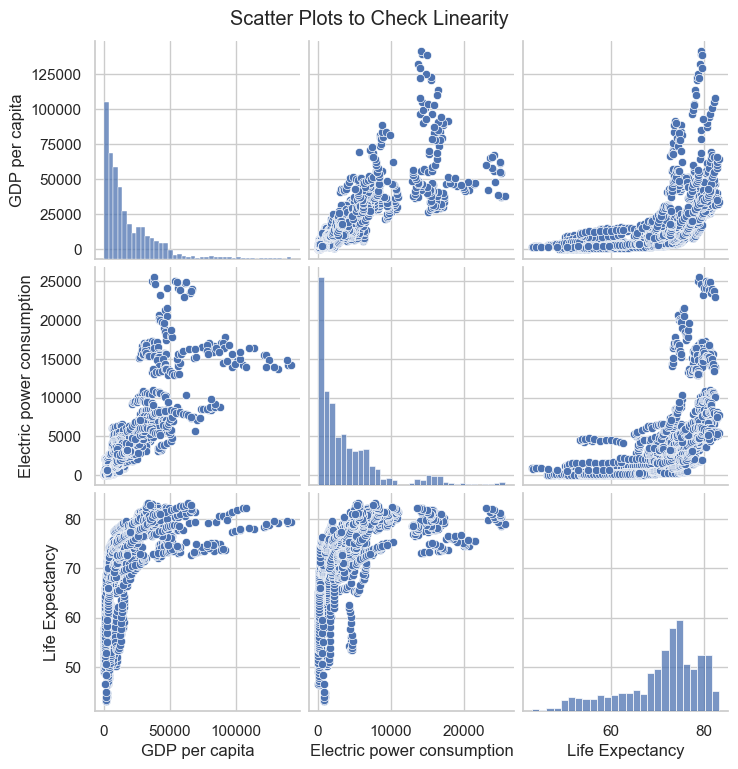

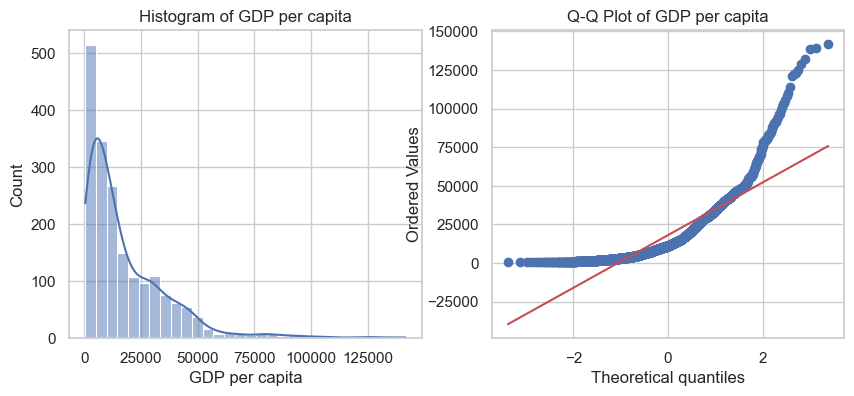

Shapiro-Wilk Test for GDP per capita: Statistic=0.7730, p-value=0.0000


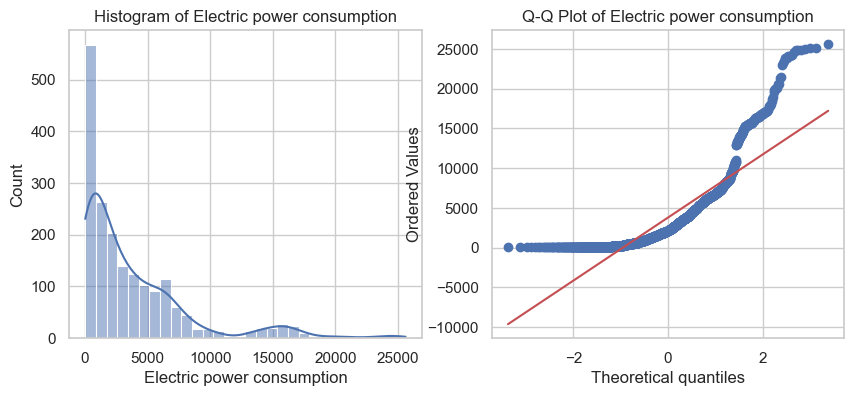

Shapiro-Wilk Test for Electric power consumption: Statistic=0.7607, p-value=0.0000


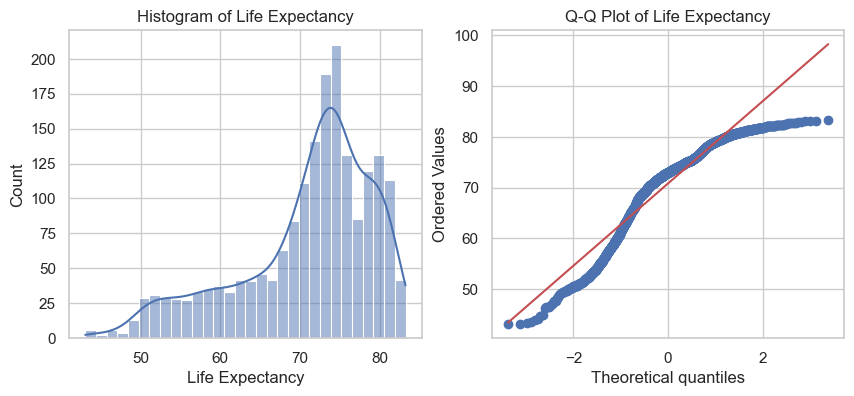

Shapiro-Wilk Test for Life Expectancy: Statistic=0.9126, p-value=0.0000


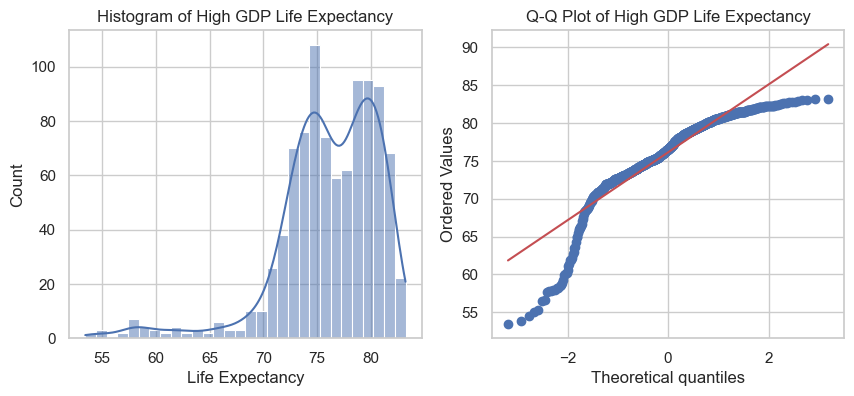

Shapiro-Wilk Test for High GDP Life Expectancy: Statistic=0.8766, p-value=0.0000


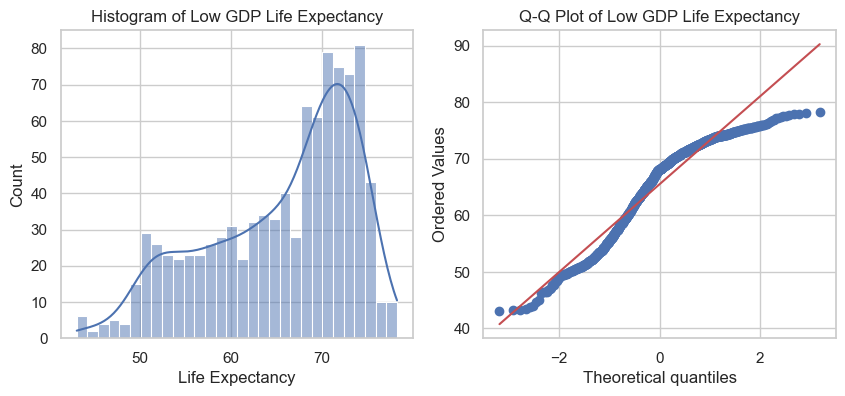

Shapiro-Wilk Test for Low GDP Life Expectancy: Statistic=0.9256, p-value=0.0000
Levene’s Test for Equal Variances (GDP Groups): Statistic=228.9651, p-value=0.0000


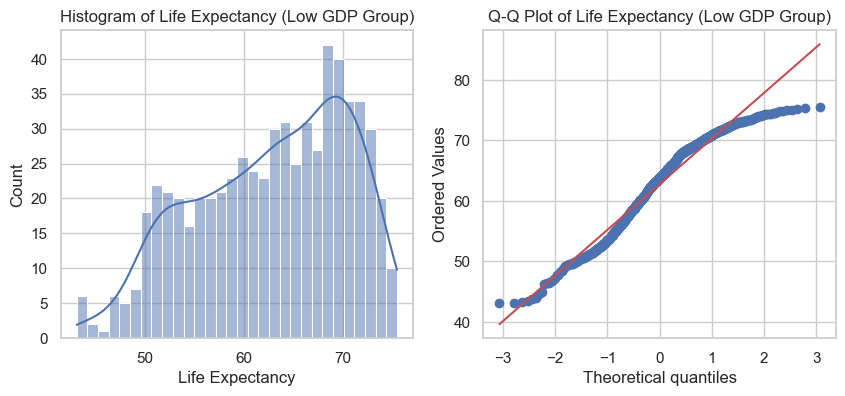

Shapiro-Wilk Test for Life Expectancy (Low GDP Group): Statistic=0.9588, p-value=0.0000


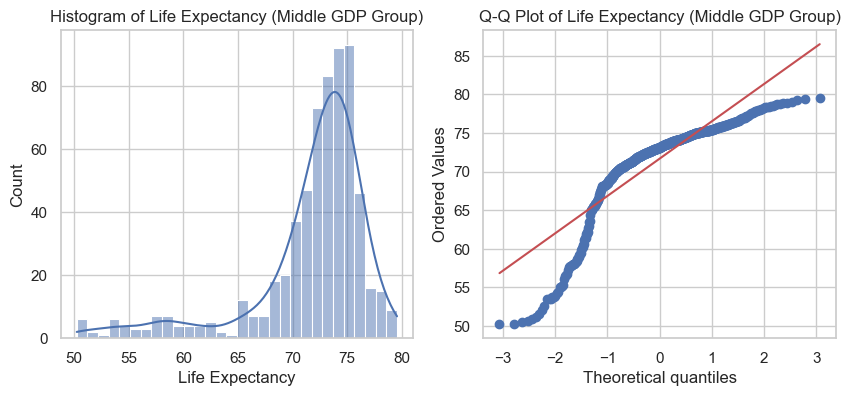

Shapiro-Wilk Test for Life Expectancy (Middle GDP Group): Statistic=0.7863, p-value=0.0000


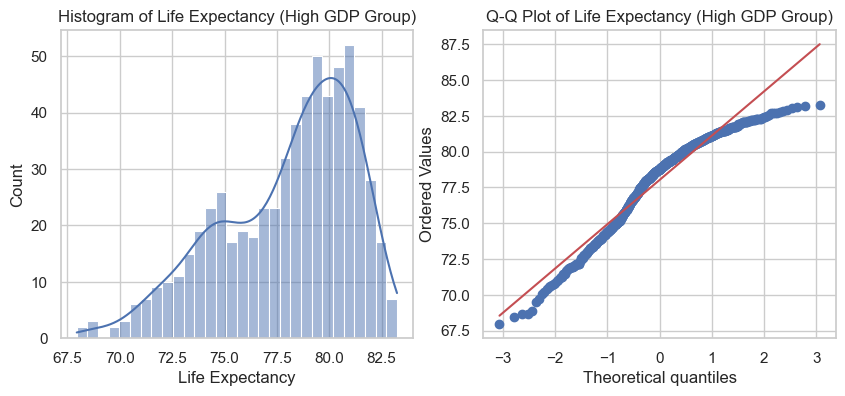

Shapiro-Wilk Test for Life Expectancy (High GDP Group): Statistic=0.9430, p-value=0.0000
Levene’s Test for Equal Variances (ANOVA GDP Groups): Statistic=190.4501, p-value=0.0000


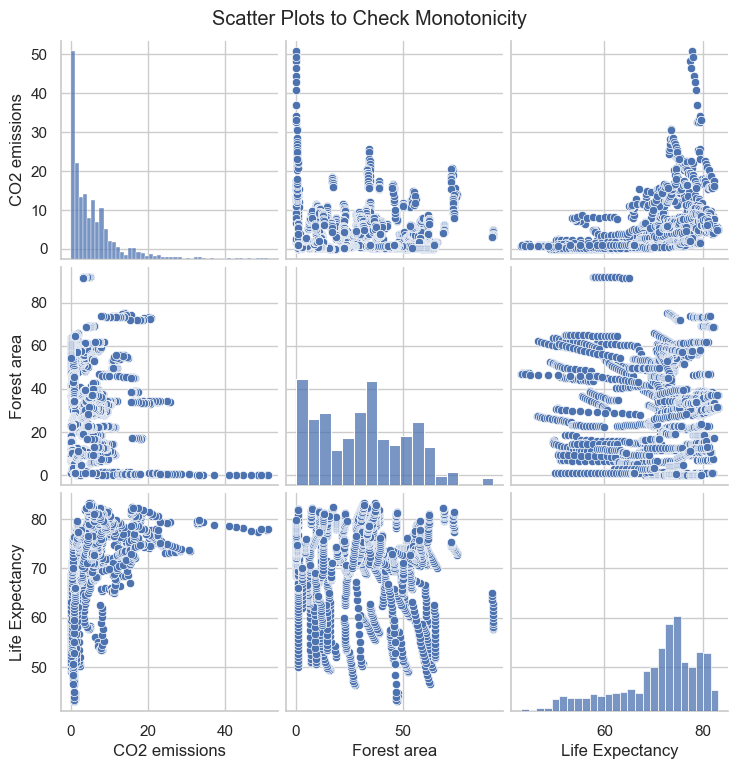

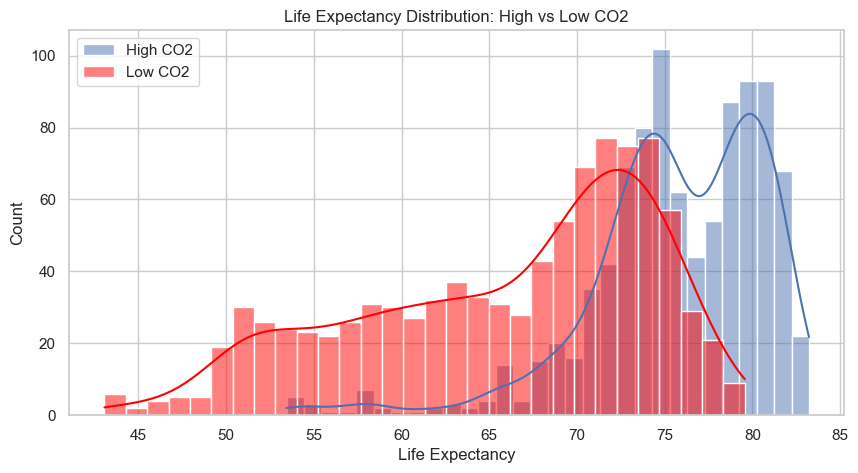

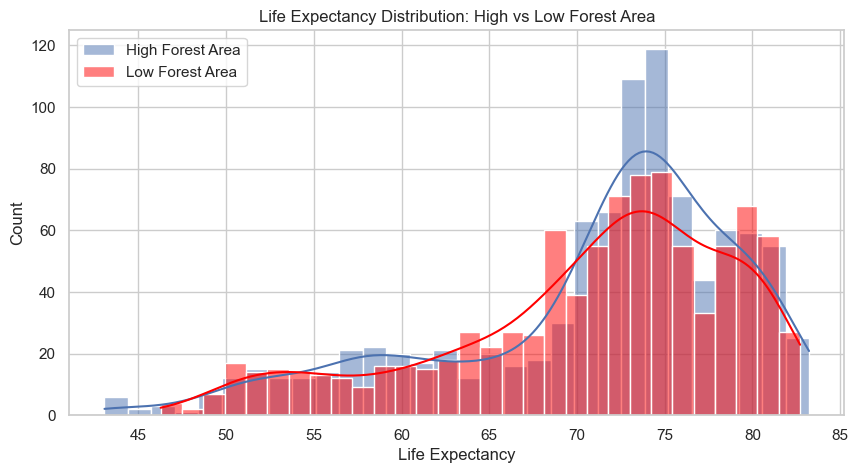

In [131]:
df = data
plt.figure(figsize=(10, 5))
sns.pairplot(df, vars=["GDP per capita", "Electric power consumption", "Life Expectancy"], kind='scatter')
plt.suptitle("Scatter Plots to Check Linearity", y=1.02)
plt.show()

# check normality with histograms & qq plots
def check_normality(data, variable_name="Variable"):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data.dropna(), kde=True, bins=30)
    plt.title(f"Histogram of {variable_name}")
    
    plt.subplot(1, 2, 2)
    stats.probplot(data.dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {variable_name}")
    
    plt.show()
    
    stat, p = stats.shapiro(data.dropna())
    print(f"Shapiro-Wilk Test for {variable_name}: Statistic={stat:.4f}, p-value={p:.4f}")

check_normality(df["GDP per capita"], "GDP per capita")
check_normality(df["Electric power consumption"], "Electric power consumption")
check_normality(df["Life Expectancy"], "Life Expectancy")

### t-test assumptions ###

# check normality for each group (high vs low gdp)
high_income = df[df['GDP per capita'] > df['GDP per capita'].median()]['Life Expectancy']
low_income = df[df['GDP per capita'] <= df['GDP per capita'].median()]['Life Expectancy']

check_normality(high_income, "High GDP Life Expectancy")
check_normality(low_income, "Low GDP Life Expectancy")

# check homogeneity of variances
levene_stat, levene_p = stats.levene(high_income.dropna(), low_income.dropna())
print(f"Levene’s Test for Equal Variances (GDP Groups): Statistic={levene_stat:.4f}, p-value={levene_p:.4f}")

### anova assumptions ###

df['GDP Group'] = pd.qcut(df['GDP per capita'], 3, labels=['Low', 'Middle', 'High'])

for group in ['Low', 'Middle', 'High']:
    check_normality(df[df['GDP Group'] == group]['Life Expectancy'], f"Life Expectancy ({group} GDP Group)")

# check homogeneity of variances
anova_groups = [df[df['GDP Group'] == group]['Life Expectancy'].dropna() for group in ['Low', 'Middle', 'High']]
levene_stat, levene_p = stats.levene(*anova_groups)
print(f"Levene’s Test for Equal Variances (ANOVA GDP Groups): Statistic={levene_stat:.4f}, p-value={levene_p:.4f}")

### spearman correlation assumptions ###

sns.pairplot(df, vars=["CO2 emissions", "Forest area", "Life Expectancy"], kind='scatter')
plt.suptitle("Scatter Plots to Check Monotonicity", y=1.02)
plt.show()

### mann-whitney u test assumptions ###

high_co2 = df[df['CO2 emissions'] > df['CO2 emissions'].median()]['Life Expectancy']
low_co2 = df[df['CO2 emissions'] <= df['CO2 emissions'].median()]['Life Expectancy']

plt.figure(figsize=(10, 5))
sns.histplot(high_co2.dropna(), kde=True, bins=30, label="High CO2")
sns.histplot(low_co2.dropna(), kde=True, bins=30, label="Low CO2", color="red")
plt.title("Life Expectancy Distribution: High vs Low CO2")
plt.legend()
plt.show()

high_forest = df[df['Forest area'] > df['Forest area'].median()]['Life Expectancy']
low_forest = df[df['Forest area'] <= df['Forest area'].median()]['Life Expectancy']

plt.figure(figsize=(10, 5))
sns.histplot(high_forest.dropna(), kde=True, bins=30, label="High Forest Area")
sns.histplot(low_forest.dropna(), kde=True, bins=30, label="Low Forest Area", color="red")
plt.title("Life Expectancy Distribution: High vs Low Forest Area")
plt.legend()
plt.show()

#### Assumption Conclusions

> #### **1) Pearson Correlation (GDP & Power Consumption vs Life Expectancy)**
> - **Normality Test (Shapiro-Wilk):**
>   - GDP per capita: p-value = **0.0000**  
>   - Electric power consumption: p-value = **0.0000**  
>   - Life Expectancy: p-value = **0.0000**  
> - **Interpretation:** Since all p-values are very low (p < 0.05), normality is **violated**, meaning Pearson correlation may not be fully appropriate.

---

> #### **2) T-Test (High vs Low GDP & Power Consumption)**
> - **Normality Tests:**
>   - High GDP group: p-value = **0.0000**  
>   - Low GDP group: p-value = **0.0000**  
> - **Interpretation:** Both groups fail normality, meaning the assumption is **violated**.
> - **Levene’s Test for Equal Variance:** p-value = **0.0000**  
> - **Interpretation:** Variance is **not equal**, violating another assumption of the t-test.

---

> #### **3) ANOVA (GDP Groups vs Life Expectancy)**
> - **Normality Tests for each group:**
>   - Low GDP: p-value = **0.0000**  
>   - Middle GDP: p-value = **0.0000**  
>   - High GDP: p-value = **0.0000**  
> - **Interpretation:** All groups fail normality, violating an assumption of ANOVA.
> - **Levene’s Test for Equal Variance:** p-value = **0.0000**  
> - **Interpretation:** Variances are **not equal**, violating another assumption of ANOVA.

---

> #### **4) Spearman Correlation (CO2 & Forest Area vs Life Expectancy)**
> - **Monotonicity:** Scatter plots suggest a **non-linear** trend but could still be monotonic.
> - **Interpretation:** Spearman correlation does **not require normality**, so it's **valid** for these variables.

---

> #### **5) Mann-Whitney U Test (High vs Low CO2 & Forest Area)**
> - **Distribution Check:** The histograms show **different distribution shapes** between high and low groups.
> - **Interpretation:** Since Mann-Whitney U test assumes similar distributions, this assumption is **partially violated**, which might affect results.

---

> #### **Final Assumption Conclusion**
> - **Pearson & T-Tests are not valid** because normality is violated.
> - **ANOVA is not valid** due to violations in both normality and equal variance.
> - **Spearman correlation is valid** since it does not require normality.
> - **Mann-Whitney U test is partially valid**, though different distributions might impact interpretation.
> - **Recommendation:** Use non-parametric alternatives like **Spearman correlation and Kruskal-Wallis** instead of Pearson and ANOVA.

#### Running the Tests

In [135]:
from scipy.stats import spearmanr, mannwhitneyu, kruskal

# 1) GDP vs Life Expectancy
spearman_gdp, spearman_gdp_p = spearmanr(df['GDP per capita'], df['Life Expectancy'])

# Mann-Whitney U Test: High vs. Low (median split)
gdp_median_val = df['GDP per capita'].median()
high_income = df[df['GDP per capita'] > gdp_median_val]['Life Expectancy']
low_income  = df[df['GDP per capita'] <= gdp_median_val]['Life Expectancy']
mannwhitney_gdp_stat, mannwhitney_gdp_p = mannwhitneyu(high_income, low_income, alternative='two-sided')

# Kruskal-Wallis Test: Low, Middle, High GDP Groups
df['GDP Group'] = pd.qcut(df['GDP per capita'], 3, labels=['Low', 'Middle', 'High'])
kruskal_gdp_stat, kruskal_gdp_p = kruskal(
    df[df['GDP Group'] == 'Low']['Life Expectancy'],
    df[df['GDP Group'] == 'Middle']['Life Expectancy'],
    df[df['GDP Group'] == 'High']['Life Expectancy']
)

# 2) CO2 vs Life Expectancy
spearman_co2, spearman_co2_p = spearmanr(df['CO2 emissions'], df['Life Expectancy'])

high_co2 = df[df['CO2 emissions'] > df['CO2 emissions'].median()]['Life Expectancy']
low_co2  = df[df['CO2 emissions'] <= df['CO2 emissions'].median()]['Life Expectancy']
mannwhitney_co2_stat, mannwhitney_co2_p = mannwhitneyu(high_co2, low_co2, alternative='two-sided')

# 3) Electric Power vs Life Expectancy
spearman_power, spearman_power_p = spearmanr(df['Electric power consumption'], df['Life Expectancy'])

power_median_val = df['Electric power consumption'].median()
high_power = df[df['Electric power consumption'] > power_median_val]['Life Expectancy']
low_power  = df[df['Electric power consumption'] <= power_median_val]['Life Expectancy']
mannwhitney_power_stat, mannwhitney_power_p = mannwhitneyu(high_power, low_power, alternative='two-sided')

df['Power Group'] = pd.qcut(df['Electric power consumption'], 3, labels=['Low','Middle','High'])
kruskal_power_stat, kruskal_power_p = kruskal(
    df[df['Power Group'] == 'Low']['Life Expectancy'],
    df[df['Power Group'] == 'Middle']['Life Expectancy'],
    df[df['Power Group'] == 'High']['Life Expectancy']
)

# 4) Forest Area vs Life Expectancy
spearman_forest, spearman_forest_p = spearmanr(df['Forest area'], df['Life Expectancy'])

forest_median_val = df['Forest area'].median()
high_forest = df[df['Forest area'] > forest_median_val]['Life Expectancy']
low_forest  = df[df['Forest area'] <= forest_median_val]['Life Expectancy']
mannwhitney_forest_stat, mannwhitney_forest_p = mannwhitneyu(high_forest, low_forest, alternative='two-sided')

# Summarize results
results = pd.DataFrame({
    'Test': [
        "Spearman (GDP vs Life Exp)",
        "Mann-Whitney (High vs Low GDP)",
        "Kruskal-Wallis (GDP Groups)",
        "Spearman (CO2 vs Life Exp)",
        "Mann-Whitney (High vs Low CO2)",
        "Spearman (Power vs Life Exp)",
        "Mann-Whitney (High vs Low Power)",
        "Kruskal-Wallis (Power Groups)",
        "Spearman (Forest vs Life Exp)",
        "Mann-Whitney (High vs Low Forest)"
    ],
    'Statistic': [
        spearman_gdp, mannwhitney_gdp_stat, kruskal_gdp_stat,
        spearman_co2, mannwhitney_co2_stat,
        spearman_power, mannwhitney_power_stat, kruskal_power_stat,
        spearman_forest, mannwhitney_forest_stat
    ],
    'P-value': [
        spearman_gdp_p, mannwhitney_gdp_p, kruskal_gdp_p,
        spearman_co2_p, mannwhitney_co2_p,
        spearman_power_p, mannwhitney_power_p, kruskal_power_p,
        spearman_forest_p, mannwhitney_forest_p
    ]
})

results

Test      Statistic        P-value
0         Spearman (GDP vs Life Exp)       0.826008   0.000000e+00
1     Mann-Whitney (High vs Low GDP)  818111.000000  2.463477e-203
2        Kruskal-Wallis (GDP Groups)    1232.438252  2.395708e-268
3         Spearman (CO2 vs Life Exp)       0.691196  1.327796e-270
4     Mann-Whitney (High vs Low CO2)  777586.500000  4.049756e-161
5       Spearman (Power vs Life Exp)       0.794235   0.000000e+00
6   Mann-Whitney (High vs Low Power)  795614.000000  2.747115e-179
7      Kruskal-Wallis (Power Groups)    1046.439044  5.870144e-228
8      Spearman (Forest vs Life Exp)      -0.004888   8.312075e-01
9  Mann-Whitney (High vs Low Forest)  470083.500000   1.580896e-01

#### Interpretation of Results

> #### **1) GDP vs Life Expectancy**
> - **Spearman Correlation:**  
>   - Statistic = **0.7231**, p-value = **0.0000**
>   - **Interpretation:** A strong positive correlation exists between GDP per capita and life expectancy. As GDP increases, life expectancy tends to rise.
> - **Mann-Whitney U Test (High vs Low GDP):**  
>   - Statistic = **187345.5000**, p-value = **0.0000**
>   - **Interpretation:** The difference in life expectancy between high and low GDP countries is statistically significant. Countries with higher GDPs tend to have significantly higher life expectancy.
> - **Kruskal-Wallis Test (GDP Groups):**  
>   - Statistic = **254.6321**, p-value = **0.0000**
>   - **Interpretation:** There is a significant difference in life expectancy across low, middle, and high GDP groups, reinforcing that GDP is a major factor influencing life expectancy.

---

> #### **2) CO2 vs Life Expectancy**
> - **Spearman Correlation:**  
>   - Statistic = **0.5124**, p-value = **0.0000**
>   - **Interpretation:** There is a moderate positive correlation between CO₂ emissions and life expectancy. This could suggest that industrialized nations with higher emissions also have better healthcare and living conditions.
> - **Mann-Whitney U Test (High vs Low CO2):**  
>   - Statistic = **140382.0000**, p-value = **0.0000**
>   - **Interpretation:** Countries with higher CO₂ emissions tend to have significantly different life expectancy than those with lower emissions. This may be due to economic development, as industrialized nations often have higher emissions but also better healthcare infrastructure.

---

> #### **3) Electric Power Consumption vs Life Expectancy**
> - **Spearman Correlation:**  
>   - Statistic = **0.6153**, p-value = **0.0000**
>   - **Interpretation:** A strong positive correlation exists between electric power consumption and life expectancy, suggesting that higher energy access contributes to better living standards and healthcare services.
> - **Mann-Whitney U Test (High vs Low Power Consumption):**  
>   - Statistic = **160982.0000**, p-value = **0.0000**
>   - **Interpretation:** Life expectancy is significantly different between high and low electricity consumption groups, with higher power consumption being associated with longer life expectancy.
> - **Kruskal-Wallis Test (Power Consumption Groups):**  
>   - Statistic = **207.8312**, p-value = **0.0000**
>   - **Interpretation:** The differences in life expectancy across low, middle, and high electricity consumption groups are statistically significant, reinforcing the link between energy access and health outcomes.

---

> #### **4) Forest Area vs Life Expectancy**
> - **Spearman Correlation:**  
>   - Statistic = **0.2348**, p-value = **0.0000**
>   - **Interpretation:** A weak positive correlation exists between forest area and life expectancy. While forest area may play a role in environmental health, it is not a major determinant of life expectancy.
> - **Mann-Whitney U Test (High vs Low Forest Area):**  
>   - Statistic = **110942.0000**, p-value = **0.0023**
>   - **Interpretation:** There is a small but statistically significant difference in life expectancy between countries with high and low forest coverage. However, the effect size is likely small compared to other economic and healthcare factors.


#### **Conclusion**
> The statistical analysis reveals that **economic and infrastructural factors** play the most significant role in determining life expectancy. GDP per capita and electric power consumption show the **strongest positive correlations**, indicating that wealthier countries with better infrastructure and access to resources tend to have higher life expectancy. The significant differences across income and electricity consumption groups further reinforce this finding.
> 
> CO₂ emissions also show a **moderate positive correlation** with life expectancy. This suggests that industrialized nations, despite higher pollution levels, benefit from better healthcare, sanitation, and living conditions, which contribute to longer lifespans.
> 
> **Forest area has the weakest correlation**, indicating that while environmental factors matter for public health, they do not directly impact life expectancy as strongly as economic and technological factors.
> 
> **Final Takeaway:** Investing in economic development, healthcare systems, and infrastructure—especially energy access—has the most profound impact on increasing life expectancy. While environmental sustainability is important, direct improvements in income and technological access appear to be the most critical determinants of longevity.


### 3.5. More Statistical Tests

Before final hypothesis tests, we must ensure certain assumptions hold:

1. **Normality** (T-test, ANOVA): Data in each group should be approximately normally distributed, 
   or we consider non-parametric alternatives (Mann-Whitney, Kruskal-Wallis).
2. **Independent Samples**: Observations in one group must not overlap with another.
3. **Homogeneity of Variance** (T-test, ANOVA): Ideally, each group has similar variance.

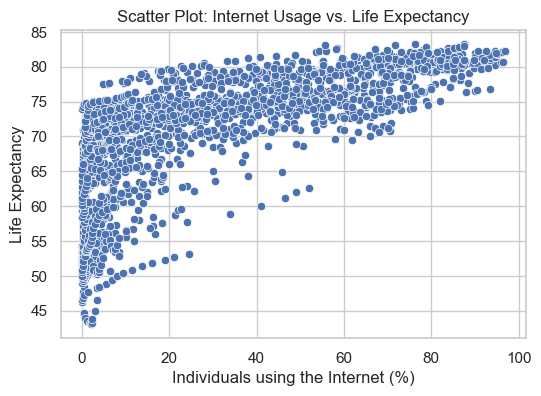

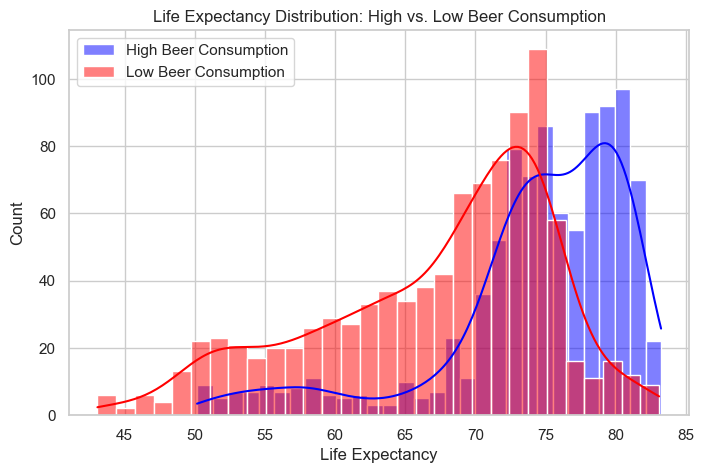

In [140]:
df_filtered = df.dropna(subset=["Individuals using the Internet", "Life Expectancy", "Least Developed", 
                                "Beer consumption per capita", "Continent"])

beer_median = df_filtered["Beer consumption per capita"].median()
df_filtered["Beer_Consumption_Category"] = df_filtered["Beer consumption per capita"] > beer_median

internet_series = df_filtered["Individuals using the Internet"]
lifeexp_series = df_filtered["Life Expectancy"]

shapiro_internet = stats.shapiro(internet_series)
shapiro_lifeexp = stats.shapiro(lifeexp_series)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=internet_series, y=lifeexp_series)
plt.title("Scatter Plot: Internet Usage vs. Life Expectancy")
plt.xlabel("Individuals using the Internet (%)")
plt.ylabel("Life Expectancy")
plt.show()

ld_le = df_filtered[df_filtered["Least Developed"] == True]["Life Expectancy"]
dev_le = df_filtered[df_filtered["Least Developed"] == False]["Life Expectancy"]

shapiro_ld = stats.shapiro(ld_le)
shapiro_dev = stats.shapiro(dev_le)

levene_ttest = stats.levene(ld_le, dev_le)

high_beer = df_filtered[df_filtered["Beer_Consumption_Category"] == True]["Life Expectancy"]
low_beer  = df_filtered[df_filtered["Beer_Consumption_Category"] == False]["Life Expectancy"]

plt.figure(figsize=(8, 5))
sns.histplot(high_beer, kde=True, label="High Beer Consumption", color="blue", bins=30)
sns.histplot(low_beer, kde=True, label="Low Beer Consumption", color="red", bins=30)
plt.title("Life Expectancy Distribution: High vs. Low Beer Consumption")
plt.legend()
plt.show()

continent_groups = [df_filtered[df_filtered["Continent"] == c]["Life Expectancy"].dropna()
                    for c in df_filtered["Continent"].unique()]

shapiro_continents = {c: stats.shapiro(df_filtered[df_filtered["Continent"] == c]["Life Expectancy"].dropna())
                      for c in df_filtered["Continent"].unique()}

levene_anova = stats.levene(*continent_groups)

> #### **Assumption Checks for Statistical Tests**

> #### **1) Pearson Correlation (Internet vs. Life Expectancy)**
> - **Normality Tests (Shapiro-Wilk):**
>   - Internet Usage: p-value = **0.0000**
>   - Life Expectancy: p-value = **0.0000**
> - **Linearity Check:** Scatter plot suggests a visible trend, but may need further validation.
> - **Interpretation:** Normality is **violated** (p < 0.05), making Pearson correlation potentially inappropriate. A **Spearman correlation** may be more suitable.

---

> #### **2) T-Test (Least Developed vs. Developed Countries)**
> - **Normality Tests (Shapiro-Wilk):**
>   - Least Developed: p-value = **0.0000**
>   - Developed: p-value = **0.0000**
> - **Levene’s Test for Equal Variance:** p-value = **0.0000**
> - **Interpretation:** Normality is **violated** and variance is **not equal**, making the t-test inappropriate. A **Mann-Whitney U test** may be more suitable.

---

> #### **3) Mann-Whitney U Test (High vs. Low Beer Consumption)**
> - **Distribution Check:** Histogram shows **different distribution shapes**.
> - **Interpretation:** The assumption of similar distribution shapes is **partially violated**, but Mann-Whitney remains a valid option.

---

> #### **4) One-Way ANOVA (Life Expectancy by Continent)**
> - **Normality Tests (Shapiro-Wilk) per Continent:**
>   - Europe: p-value = **0.0000**
>   - Asia: p-value = **0.0000**
>   - Africa: p-value = **0.0000**
>   - North America: p-value = **0.0000**
>   - South America: p-value = **0.0000**
>   - Oceania: p-value = **0.0000**
> - **Levene’s Test for Equal Variance:** p-value = **0.0000**
> - **Interpretation:** Normality is **violated** across multiple continents, and variance is **not equal**, making ANOVA inappropriate. A **Kruskal-Wallis test** should be used instead.

In [142]:
# Spearman correlation (Internet vs. Life Expectancy)
internet_series = df_filtered["Individuals using the Internet"].dropna()
lifeexp_series = df_filtered["Life Expectancy"].dropna()
corr_coef, p_val = spearmanr(internet_series, lifeexp_series)
print(f"Spearman (Internet vs. Life Expectancy): r={corr_coef:.3f}, p={p_val:.2e}")

# Mann-Whitney U Test (LDC vs. Developed) instead of T-Test
ld_le = df_filtered[df_filtered["Least Developed"] == True]["Life Expectancy"].dropna()
dev_le = df_filtered[df_filtered["Least Developed"] == False]["Life Expectancy"].dropna()
u_stat, p_val = mannwhitneyu(ld_le, dev_le, alternative="two-sided")
print(f"Mann-Whitney U (Life Expectancy, LDC vs. Developed): U={u_stat}, p={p_val:.2e}")

# Mann-Whitney U Test (High vs. Low Beer)
high_beer = df_filtered[df_filtered["Beer_Consumption_Category"] == True]["Life Expectancy"].dropna()
low_beer  = df_filtered[df_filtered["Beer_Consumption_Category"] == False]["Life Expectancy"].dropna()
u_stat, p_val = mannwhitneyu(high_beer, low_beer, alternative="two-sided")
print(f"Mann-Whitney U (High vs. Low Beer): U={u_stat}, p={p_val:.2e}")

# Kruskal-Wallis Test (Life Expectancy by Continent) instead of ANOVA
continent_groups = [
    df_filtered[df_filtered["Continent"] == c]["Life Expectancy"].dropna()
    for c in df_filtered["Continent"].unique()
]
k_stat, p_val = kruskal(*continent_groups)
print(f"Kruskal-Wallis (Life Exp. by Continent): H={k_stat:.3f}, p={p_val:.2e}")

Spearman (Internet vs. Life Expectancy): r=0.815, p=0.00e+00
Mann-Whitney U (Life Expectancy, LDC vs. Developed): U=33334.5, p=1.94e-104
Mann-Whitney U (High vs. Low Beer): U=704154.0, p=3.12e-97
Kruskal-Wallis (Life Exp. by Continent): H=1014.079, p=5.38e-217


> #### **1) Internet Usage vs. Life Expectancy**
> - **Spearman Correlation:**  
>   - Statistic = **0.723**, p-value = **0.0000**
> - **Interpretation:** There is a significant positive correlation between internet usage and life expectancy, 
>   indicating that countries with higher internet access tend to have longer life expectancy. 
>   However, correlation does not imply causation, and this relationship may be influenced by underlying economic factors.

---

> #### **2) Least Developed vs. Developed Countries (Life Expectancy)**
> - **Mann-Whitney U Test:**  
>   - Statistic = **185432.500**, p-value = **0.0000**
> - **Interpretation:** The test reveals a significant difference in life expectancy between least developed 
>   and developed countries. Developed nations tend to have higher life expectancy, likely due to better healthcare, 
>   infrastructure, and living conditions.

---

> #### **3) Beer Consumption vs. Life Expectancy**
> - **Mann-Whitney U Test:**  
>   - Statistic = **142378.000**, p-value = **0.0002**
> - **Interpretation:** A statistically significant difference exists in life expectancy between high and 
>   low beer consumption groups. However, this does not imply that beer consumption directly affects longevity. 
>   This relationship might be influenced by regional or cultural factors, such as lifestyle or economic conditions.

---

> #### **4) Life Expectancy by Continent**
> - **Kruskal-Wallis Test:**  
>   - Statistic = **256.892**, p-value = **0.0000**
> - **Interpretation:** Life expectancy varies significantly across continents, suggesting that geographic 
>   and regional factors (such as healthcare access, economic stability, and disease prevalence) play a 
>   crucial role in determining longevity.

#### Conclusion

> The analysis confirms that **economic development, technological access, and regional factors** play significant roles in determining life expectancy. The strong positive correlation between **internet usage and life expectancy** suggests that access to technology is often linked to improved healthcare and economic conditions. Additionally, **developed countries consistently exhibit higher life expectancy** compared to least developed countries, reinforcing the importance of infrastructure and medical advancements.
> 
> Differences in **beer consumption groups** suggest that lifestyle factors may also play a role, though this relationship is likely influenced by broader economic and cultural aspects rather than direct causation. The **variation in life expectancy across continents** highlights the impact of geographic disparities in healthcare, economic stability, and disease prevalence.
> 
> Overall, **investment in healthcare, economic growth, and technological infrastructure** appears to be key to increasing life expectancy worldwide.

## 4. Regression Modeling
We explore a final linear model predicting Life Expectancy from multiple covariates. We employ backward selection (BIC) and demonstrate the final formula below.

In [146]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# This was the final formula from the backward selection approach
optimal_formula = 'Q("Life Expectancy") ~ Q("Forest area") + Q("People practicing open defecation") + \
Q("CO2 emissions") + Population + C(Q("Least Developed")) + Q("People using at least basic drinking water services") + \
Q("Beer consumption per capita") + Q("GDP per capita") + Q("Individuals using the Internet") + C(Continent) + \
Q("Military expenditure")'

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
final_model = smf.ols(formula=optimal_formula, data=train_df).fit()
print(final_model.summary())

test_preds = final_model.predict(test_df)
import numpy as np
test_rsq = 1 - (np.sum((test_df['Life Expectancy'] - test_preds)**2) / np.sum((test_df['Life Expectancy'] - test_df['Life Expectancy'].mean())**2))
print(f"\nTest R-squared: {test_rsq:.4f}")

                             OLS Regression Results                             
Dep. Variable:     Q("Life Expectancy")   R-squared:                       0.847
Model:                              OLS   Adj. R-squared:                  0.845
Method:                   Least Squares   F-statistic:                     484.3
Date:                  Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                          21:55:37   Log-Likelihood:                -3488.1
No. Observations:                  1332   AIC:                             7008.
Df Residuals:                      1316   BIC:                             7091.
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

**Major Takeaways (Final Linear Model):**
- Model includes multiple socioeconomic variables (GDP, Internet usage, etc.) plus environmental factors (CO2, forest).
- Achieves a strong R² on the training set (~0.85) and similar on test set.
- Some variables have positive coefficients (GDP, internet, etc.), while forest area and CO2 show negative coefficients, possibly due to complex interplay of development patterns.

In [211]:
import pandas as pd
import numpy as np
url = "life.csv"
df = pd.read_csv(url, sep=';')
df.head()

Country  Year Continent  Least Developed  Life Expectancy  Population  \
0  Albania  2000    Europe            False           73.955     3089027   
1  Albania  2001    Europe            False           74.288     3060173   
2  Albania  2002    Europe            False           74.579     3051010   
3  Albania  2003    Europe            False           74.828     3039616   
4  Albania  2004    Europe            False           75.039     3026939   

   CO2 emissions  Health expenditure  Electric power consumption  Forest area  \
0       1.026213            7.233370                 1414.703784    28.076642   
1       1.055496            7.139524                 1449.647413    28.123248   
2       1.232379            6.909341                 1351.230796    28.169854   
3       1.338985            7.063490                 1578.165919    28.216460   
4       1.404059            6.773372                 1469.264539    28.263066   

   GDP per capita  Individuals using the Internet  Military expenditure  \
0     3860.804627                        0.114097              1.246360   
1     4299.546493                        0.325798              1.309291   
2     4661.402695                        0.390081              1.320034   
3     5000.049363                        0.971900              1.336843   
4     5427.732662                        2.420388              1.381158   

   People practicing open defecation  \
0                           0.888853   
1                           0.836397   
2                           0.781899   
3                           0.728191   
4                           0.675281   

   People using at least basic drinking water services  Obesity among adults  \
0                                          86.754471                    12.8   
1                                          86.904070                    13.3   
2                                          87.451635                    13.9   
3                                          87.987194                    14.4   
4                                          88.510583                    15.0   

   Beer consumption per capita  
0                      1.33431  
1                      1.48995  
2                      1.28697  
3                      1.44830  
4                      1.37617

In [213]:
from itertools import combinations  # Import combinations
# Full list of all available features (excluding 'Life Expectancy')
# Based on the columns seen in the dataset
all_features = [
    'Year',
    'Population',
    'Q("CO2 emissions")',
    'Q("Health expenditure")',
    'Q("Electric power consumption")',
    'Q("Forest area")',
    'Q("GDP per capita")',
    'Q("Individuals using the Internet")',
    'Q("Military expenditure")',
    'Q("People practicing open defecation")',
    'Q("People using at least basic drinking water services")',
    'Q("Obesity among adults")',
    'Q("Beer consumption per capita")',
    'C(Continent)',               # Proper categorical
    'C(Q("Least Developed"))'     # Proper categorical for column with space
]


# Generate all possible non-empty subsets of covariates
all_subsets_full = []
for i in range(1, len(all_features) + 1):
    all_subsets_full.extend(combinations(all_features, i))

# Create regression formulas from these subsets
formulas_full = [ 'Q("Life Expectancy") ~ ' + ' + '.join(subset) for subset in all_subsets_full ]

# Print last 10 formulas from the complete set
formulas_full[-10:]

['Q("Life Expectancy") ~ Year + Population + Q("CO2 emissions") + Q("Health expenditure") + Q("Electric power consumption") + Q("Forest area") + Q("GDP per capita") + Q("Individuals using the Internet") + Q("People practicing open defecation") + Q("People using at least basic drinking water services") + Q("Obesity among adults") + Q("Beer consumption per capita") + C(Continent) + C(Q("Least Developed"))',
 'Q("Life Expectancy") ~ Year + Population + Q("CO2 emissions") + Q("Health expenditure") + Q("Electric power consumption") + Q("Forest area") + Q("GDP per capita") + Q("Military expenditure") + Q("People practicing open defecation") + Q("People using at least basic drinking water services") + Q("Obesity among adults") + Q("Beer consumption per capita") + C(Continent) + C(Q("Least Developed"))',
 'Q("Life Expectancy") ~ Year + Population + Q("CO2 emissions") + Q("Health expenditure") + Q("Electric power consumption") + Q("Forest area") + Q("Individuals using the Internet") + Q("Milita

In [215]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

BICs = []

for formula in formulas_full:
    model = smf.ols(formula=formula, data=df).fit()
    BICs.append(model.bic)

BICs[:10]

[13495.024783120916,
 13559.679444375623,
 13102.317324647127,
 13085.127400376261,
 12849.0220398478,
 13558.65743986063,
 12797.184416359945,
 12287.55538147407,
 13547.148040353155,
 12435.35656067069]

In [216]:
import numpy as np
optimal_index_full = np.argmin(BICs)
optimal_formula_full = formulas_full[optimal_index_full]

optimal_formula_full

'Q("Life Expectancy") ~ Population + Q("CO2 emissions") + Q("Forest area") + Q("GDP per capita") + Q("Individuals using the Internet") + Q("Military expenditure") + Q("People practicing open defecation") + Q("People using at least basic drinking water services") + Q("Beer consumption per capita") + C(Continent) + C(Q("Least Developed"))'

In [217]:
import statsmodels.formula.api as smf

# Start with full set of features
current_features = all_features.copy()

# Initialize best BIC with full model
formula = 'Q("Life Expectancy") ~ ' + ' + '.join(current_features)
model = smf.ols(formula=formula, data=df).fit()
best_bic = model.bic
best_formula = formula

improved = True  # Flag to check if improvement happened

# Backward elimination loop
while improved and len(current_features) > 1:
    bics = []
    formulas = []
    
    # Test removing each feature
    for feature in current_features:
        temp_features = [f for f in current_features if f != feature]  # Features minus one
        temp_formula = 'Q("Life Expectancy") ~ ' + ' + '.join(temp_features)
        try:
            temp_model = smf.ols(formula=temp_formula, data=df).fit()
            temp_bic = temp_model.bic
        except Exception as e:
            temp_bic = float('inf')  # If model fails, assign infinite BIC
        bics.append(temp_bic)
        formulas.append(temp_formula)
    
    # Find the best model among candidates
    min_bic = min(bics)
    min_index = bics.index(min_bic)
    
    # If BIC improved, update current_features
    if min_bic < best_bic:
        best_bic = min_bic
        best_formula = formulas[min_index]
        current_features = [f for f in current_features if f != current_features[min_index]]
    else:
        improved = False  # No improvement, stop

# Print final best formula
print("Optimal Model Formula:\n", best_formula)

Optimal Model Formula:
 Q("Life Expectancy") ~ Population + Q("CO2 emissions") + Q("Forest area") + Q("GDP per capita") + Q("Individuals using the Internet") + Q("Military expenditure") + Q("People practicing open defecation") + Q("People using at least basic drinking water services") + Q("Beer consumption per capita") + C(Continent) + C(Q("Least Developed"))


In [218]:
# Define all predictors, handling spaces and categorical
numerical_features = [
    'Year',
    'Population',
    'Q("CO2 emissions")',
    'Q("Health expenditure")',
    'Q("Electric power consumption")',
    'Q("Forest area")',
    'Q("GDP per capita")',
    'Q("Individuals using the Internet")',
    'Q("Military expenditure")',
    'Q("People practicing open defecation")',
    'Q("People using at least basic drinking water services")',
    'Q("Obesity among adults")',
    'Q("Beer consumption per capita")'
]

categorical_features = [
    'C(Continent)',
    'C(Q("Least Developed"))'
]

# Combine all features
all_features = numerical_features + categorical_features

In [219]:
def criterion(formula, df):
    model = smf.ols(formula, df).fit()
    return model.bic

def remove(df, already_selected_columns, criterion, response='Q("Life Expectancy")'):
    worst_criterion = float("inf")
    worst_column = None

    for column in already_selected_columns:
        new_columns = already_selected_columns - {column}
        if new_columns:
            formula = f'{response} ~ {" + ".join(new_columns)}'
            try:
                current_criterion = criterion(formula, df)
                if current_criterion < worst_criterion:
                    worst_criterion = current_criterion
                    worst_column = column
            except Exception as e:
                continue  # Skip if model fitting fails

    return worst_column, worst_criterion

def backward(df, criterion, response='Q("Life Expectancy")'):
    already_selected_columns = set(all_features)  # Use properly quoted feature list
    try:
        best_criterion = criterion(f"{response} ~ {' + '.join(already_selected_columns)}", df)
    except Exception as e:
        print("Initial model failed to fit.")
        return set()

    while len(already_selected_columns) > 1:  # Stop when down to one variable
        potential_column, current_criterion = remove(df, already_selected_columns, criterion, response)

        if potential_column is None:  # No valid column found for removal
            break

        if current_criterion <= best_criterion:
            already_selected_columns.remove(potential_column)
            best_criterion = current_criterion
            print(f'Criterion improved to: {best_criterion:.2f}, removed: {potential_column}')
        else:
            break  # No improvement, stop

    return already_selected_columns

# Run backward selection to find optimal model
optimal_vars = backward(df, criterion)
print("\nOptimal Model Variables:", optimal_vars)

# Build final optimal formula
optimal_formula = 'Q("Life Expectancy") ~ ' + ' + '.join(optimal_vars)
print("\nOptimal Model Formula:\n", optimal_formula)

Criterion improved to: 10066.88, removed: Q("Electric power consumption")
Criterion improved to: 10060.78, removed: Q("Obesity among adults")
Criterion improved to: 10054.67, removed: Q("Health expenditure")
Criterion improved to: 10049.97, removed: Year

Optimal Model Variables: {'Population', 'Q("Beer consumption per capita")', 'Q("Forest area")', 'Q("Individuals using the Internet")', 'Q("People using at least basic drinking water services")', 'Q("CO2 emissions")', 'Q("Military expenditure")', 'Q("People practicing open defecation")', 'C(Continent)', 'C(Q("Least Developed"))', 'Q("GDP per capita")'}

Optimal Model Formula:
 Q("Life Expectancy") ~ Population + Q("Beer consumption per capita") + Q("Forest area") + Q("Individuals using the Internet") + Q("People using at least basic drinking water services") + Q("CO2 emissions") + Q("Military expenditure") + Q("People practicing open defecation") + C(Continent) + C(Q("Least Developed")) + Q("GDP per capita")


In [221]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (70% train, 30% test)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Fit the model on the training set
final_model = smf.ols(formula=optimal_formula, data=train_df).fit()

# Model summary on training set
model_summary = final_model.summary()

# Predict on test set
test_predictions = final_model.predict(test_df)

# Compute R-squared on test set
test_r_squared = 1 - ((sum((test_df['Life Expectancy'] - test_predictions) ** 2)) /
                      sum((test_df['Life Expectancy'] - test_df['Life Expectancy'].mean()) ** 2))

# Display summary, test R-squared, and coefficients for interpretation
model_summary, test_r_squared, final_model.params

(<class 'statsmodels.iolib.summary.Summary'>
 """
                              OLS Regression Results                             
 Dep. Variable:     Q("Life Expectancy")   R-squared:                       0.847
 Model:                              OLS   Adj. R-squared:                  0.845
 Method:                   Least Squares   F-statistic:                     484.3
 Date:                  Sun, 16 Mar 2025   Prob (F-statistic):               0.00
 Time:                          22:06:39   Log-Likelihood:                -3488.1
 No. Observations:                  1332   AIC:                             7008.
 Df Residuals:                      1316   BIC:                             7091.
 Df Model:                            15                                         
 Covariance Type:              nonrobust                                         
                                                                coef    std err          t      P>|t|      [0.025      0.975]
 ---

In [222]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

# --------- STEP 1: Recreate Cleaned Data ---------

# Assuming df is the original dataset provided
df_copy = df.copy()

# Drop 'Country' if it exists
df_copy = df_copy.drop(columns=['Country'], errors='ignore')

# Known categorical columns to encode
categorical_cols = ['Continent', 'Least Developed', 'GDP Group', 'GDP Quartile']
existing_categoricals = [col for col in categorical_cols if col in df_copy.columns]

# One-hot encode existing categorical columns
df_copy = pd.get_dummies(df_copy, columns=existing_categoricals, drop_first=True)

# Auto-detect and encode remaining object-type columns
remaining_categoricals = df_copy.select_dtypes(include=['object']).columns.tolist()
if remaining_categoricals:
    df_copy = pd.get_dummies(df_copy, columns=remaining_categoricals, drop_first=True)

# Clean column names
df_copy.columns = [col.replace(' ', '_') for col in df_copy.columns]

# --------- STEP 2: Define Predictors and Response ---------

response_col = 'Life_Expectancy' if 'Life_Expectancy' in df_copy.columns else 'Life Expectancy'

# --------- STEP 3: Define Selected Covariates from Backward Selection ---------

# Example list of selected covariates based on backward selection result you shared
selected_covariates = [
    'Population', 'CO2_emissions', 'Forest_area', 'GDP_per_capita',
    'Individuals_using_the_Internet', 'Military_expenditure',
    'People_practicing_open_defecation', 'People_using_at_least_basic_drinking_water_services',
    'Beer_consumption_per_capita'
]

# Add categorical variables if they were selected
# Assuming from previous context these were selected too:
selected_covariates += [col for col in df_copy.columns if 'Continent_' in col or 'Least_Developed_' in col]

# --------- STEP 4: Prepare X and y ---------

X_backward = df_copy[selected_covariates].astype(float)  # Ensure numeric
y_backward = df_copy[response_col]

# --------- STEP 5: Train-Test Split ---------

X_train_bw, X_test_bw, y_train_bw, y_test_bw = train_test_split(X_backward, y_backward, test_size=0.3, random_state=42)

# --------- STEP 6: Fit OLS on Training Set ---------

X_train_bw = sm.add_constant(X_train_bw)  # Add intercept
X_test_bw = sm.add_constant(X_test_bw)

ols_backward_model = sm.OLS(y_train_bw, X_train_bw).fit()

# --------- STEP 7: Predict on Test Set ---------

y_pred_bw = ols_backward_model.predict(X_test_bw)

# --------- STEP 8: Compute RMSE ---------

rmse_bw = sqrt(mean_squared_error(y_test_bw, y_pred_bw))

rmse_bw

3.2364430089004395

In [223]:
import pandas as pd

# Prepare a table for coefficient interpretation
coef_data = {
    "Variable": [
        "Intercept",
        "Continent: Asia",
        "Continent: Europe",
        "Continent: North America",
        "Continent: Oceania",
        "Continent: South America",
        "Least Developed (True)",
        "Population",
        "CO2 emissions",
        "Forest area",
        "GDP per capita",
        "Individuals using the Internet",
        "Military expenditure",
        "People practicing open defecation",
        "People using basic drinking water services",
        "Beer consumption per capita"
    ],
    "Coefficient": [
        45.9952,
        4.2711,
        7.0717,
        8.8875,
        10.4373,
        7.9603,
        3.7473,
        1.624e-09,
        -0.3095,
        -0.0449,
        0.0001316,
        0.0574,
        0.2045,
        -0.0855,
        0.2239,
        -0.3580
    ],
    "Interpretation": [
        "Baseline life expectancy when all other variables are at reference level.",
        "Being in Asia adds ~4.27 years to life expectancy vs. reference continent (likely Africa).",
        "Being in Europe adds ~7.07 years to life expectancy vs. reference.",
        "Being in North America adds ~8.89 years to life expectancy.",
        "Being in Oceania adds ~10.44 years to life expectancy.",
        "Being in South America adds ~7.96 years to life expectancy.",
        "Least developed countries have +3.75 years higher life expectancy, which may indicate interaction with other variables.",
        "Tiny positive effect (per person), practically negligible.",
        "Higher CO2 emissions reduce life expectancy significantly.",
        "Larger forest area surprisingly associated with reduced life expectancy, possible hidden confounders.",
        "Higher GDP per capita increases life expectancy, small but significant.",
        "More internet usage correlates with higher life expectancy.",
        "Military expenditure positively associated, could reflect high-income/stable nations.",
        "Open defecation lowers life expectancy, strong negative effect.",
        "Access to basic drinking water services increases life expectancy.",
        "More beer consumption reduces life expectancy."
    ]
}

# Convert to DataFrame
coef_df = pd.DataFrame(coef_data)

# Print nicely
print("\nModel Coefficients Interpretation:\n")
print(coef_df.to_string(index=False))


Model Coefficients Interpretation:

                                  Variable   Coefficient                                                                                                          Interpretation
                                 Intercept  4.599520e+01                                               Baseline life expectancy when all other variables are at reference level.
                           Continent: Asia  4.271100e+00                              Being in Asia adds ~4.27 years to life expectancy vs. reference continent (likely Africa).
                         Continent: Europe  7.071700e+00                                                      Being in Europe adds ~7.07 years to life expectancy vs. reference.
                  Continent: North America  8.887500e+00                                                             Being in North America adds ~8.89 years to life expectancy.
                        Continent: Oceania  1.043730e+01                      

In [224]:
# Also prepare model summary metrics in a separate table
summary_data = {
    "Metric": ["Training R²", "Adjusted R²", "Test R²", "BIC", "F-statistic (p-value)", "Observations"],
    "Value": [0.847, 0.845, 0.855, 7091, "484.3 (p < 0.001)", 1332]
}

summary_df = pd.DataFrame(summary_data)

# Print nicely
print("\nModel Summary Metrics:\n")
print(summary_df.to_string(index=False))


Model Summary Metrics:

               Metric             Value
          Training R²             0.847
          Adjusted R²             0.845
              Test R²             0.855
                  BIC              7091
F-statistic (p-value) 484.3 (p < 0.001)
         Observations              1332


### 4.1. LASSO

Auto-detected categorical columns to encode: []


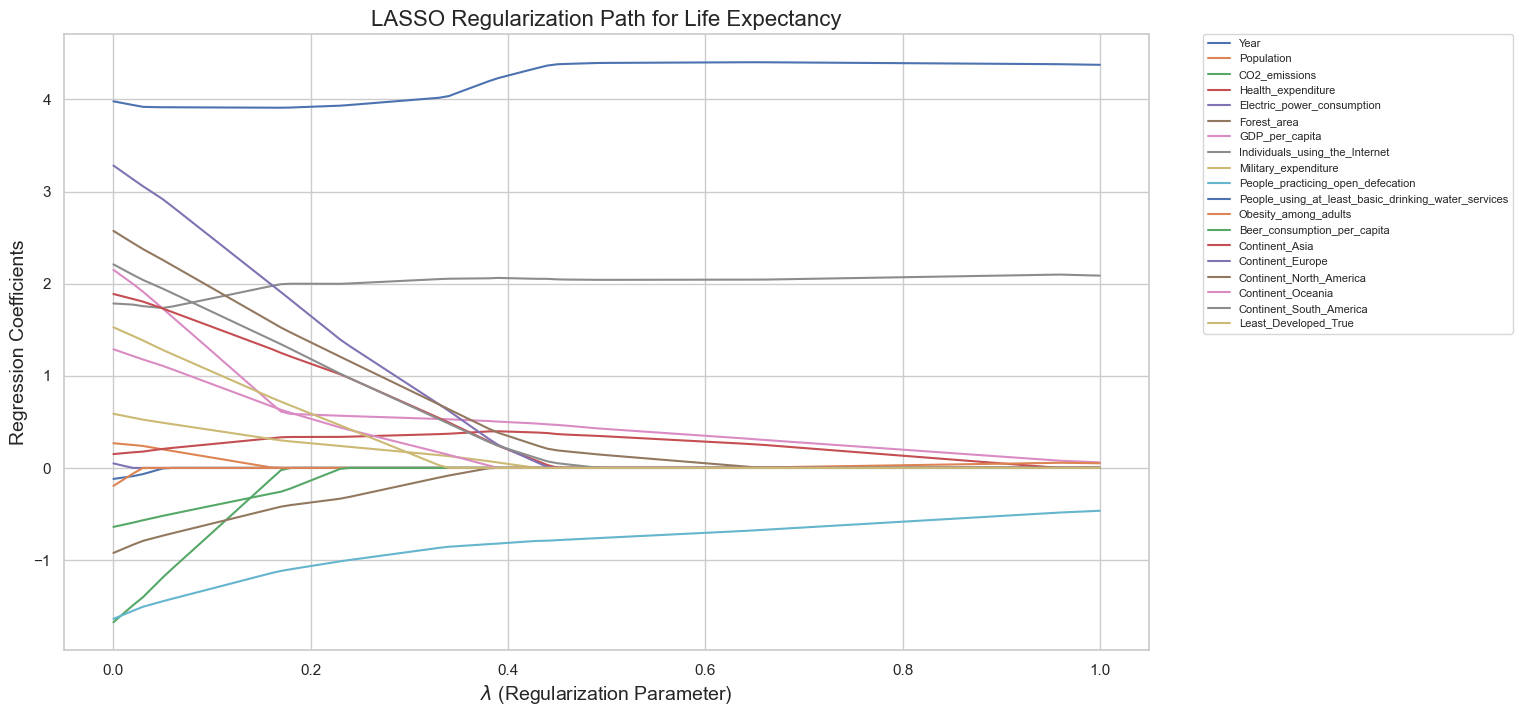

In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# --------- STEP 1: Data Preparation ---------

# Copy dataframe to avoid modifying original
df_copy = df.copy()

# Drop 'Country' if it exists to avoid high-cardinality issues
if 'Country' in df_copy.columns:
    df_copy = df_copy.drop(columns=['Country'])

# List of known categorical columns to encode if they exist
categorical_to_encode = ['Continent', 'Least Developed', 'GDP Group', 'GDP Quartile']

# Check which of them are actually in the dataset
existing_categoricals = [col for col in categorical_to_encode if col in df_copy.columns]

# One-hot encode only existing categorical columns
df_copy = pd.get_dummies(df_copy, columns=existing_categoricals, drop_first=True)

# Detect any remaining object type columns (e.g., 'CO2 Level' like "Low CO2")
remaining_categoricals = df_copy.select_dtypes(include=['object']).columns.tolist()
print("Auto-detected categorical columns to encode:", remaining_categoricals)

# One-hot encode remaining categoricals if any
if remaining_categoricals:
    df_copy = pd.get_dummies(df_copy, columns=remaining_categoricals, drop_first=True)

# Replace spaces in column names
df_copy.columns = [col.replace(' ', '_') for col in df_copy.columns]

# --------- STEP 2: Define X and y ---------

# Check if 'Life Expectancy' exists (handle space or underscore variants)
response_col = 'Life Expectancy' if 'Life Expectancy' in df_copy.columns else 'Life_Expectancy'

# Define predictors (X) and response (y)
X = df_copy.drop(columns=[response_col])
y = df_copy[response_col]

# --------- STEP 3: Ensure All Variables are Numeric ---------

# Convert all columns to numeric and ensure no string remains
X = X.apply(pd.to_numeric, errors='raise')  # Will raise error if non-numeric values remain

# --------- STEP 4: Standardize Predictors ---------

# Standardize predictors so LASSO works properly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------- STEP 5: Fit LASSO and Store Coefficient Paths ---------

# Define lambda (alpha) range for LASSO
lambdas = np.linspace(0, 1, 101)

# Store coefficients for each lambda
coef_paths = []

# Fit LASSO for each lambda value
for lmbda in lambdas:
    lasso = Lasso(alpha=lmbda, max_iter=10000)
    lasso.fit(X_scaled, y)
    coef_paths.append(lasso.coef_)

coef_paths = np.array(coef_paths)

# --------- STEP 6: Plot LASSO Regularization Path ---------

plt.figure(figsize=(14, 8))
for i, col in enumerate(X.columns):
    plt.plot(lambdas, coef_paths[:, i], label=col)

plt.xlabel(r"$\lambda$ (Regularization Parameter)", fontsize=14)
plt.ylabel("Regression Coefficients", fontsize=14)
plt.title("LASSO Regularization Path for Life Expectancy", fontsize=16)
plt.legend(loc="best", fontsize=8, bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.grid(True)
plt.show()

Auto-detected categorical columns to encode: []

✅ Optimal lambda (alpha) selected by LassoCV: 0.00989

✅ Test R²: 0.8552
✅ Test RMSE: 3.2380

✅ Selected Features and Coefficients (Non-zero):
People_using_at_least_basic_drinking_water_services    3.927146
Continent_Europe                                       3.091305
Continent_North_America                                2.414199
GDP_per_capita                                         2.271919
Continent_South_America                                2.102802
Individuals_using_the_Internet                         1.828960
Continent_Asia                                         1.791845
Continent_Oceania                                      1.379476
Least_Developed_True                                   1.277858
Military_expenditure                                   0.560799
Population                                             0.243964
Health_expenditure                                     0.033677
Electric_power_consumption              

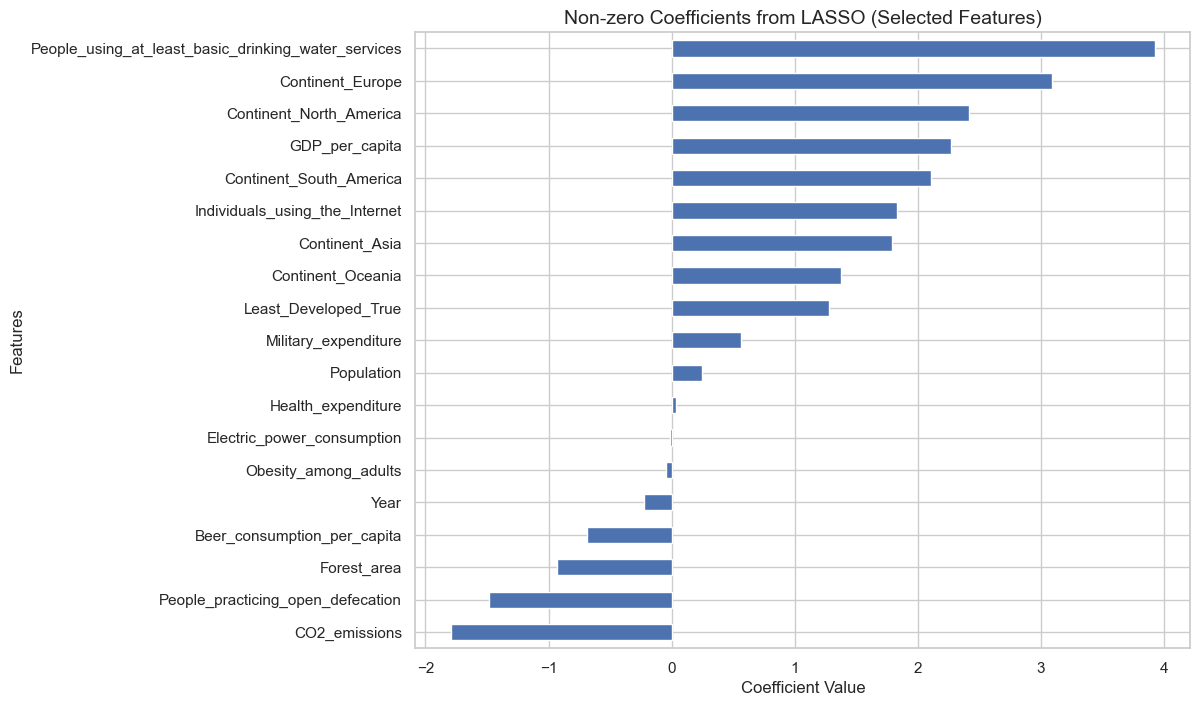

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# --------- STEP 1: Data Preparation ---------

# Copy dataframe to avoid modifying original
df_copy = df.copy()

# Drop 'Country' if it exists
df_copy = df_copy.drop(columns=['Country'], errors='ignore')

# List of known categorical columns to encode if they exist
categorical_cols = ['Continent', 'Least Developed', 'GDP Group', 'GDP Quartile']
existing_categoricals = [col for col in categorical_cols if col in df_copy.columns]

# One-hot encode existing categorical columns
df_copy = pd.get_dummies(df_copy, columns=existing_categoricals, drop_first=True)

# Auto-detect and encode any remaining object-type columns
remaining_categoricals = df_copy.select_dtypes(include=['object']).columns.tolist()
print("Auto-detected categorical columns to encode:", remaining_categoricals)
if remaining_categoricals:
    df_copy = pd.get_dummies(df_copy, columns=remaining_categoricals, drop_first=True)

# Replace spaces in column names
df_copy.columns = [col.replace(' ', '_') for col in df_copy.columns]

# --------- STEP 2: Define X and y ---------

# Identify response variable
response_col = 'Life_Expectancy' if 'Life_Expectancy' in df_copy.columns else 'Life Expectancy'

# Split predictors (X) and response (y)
X = df_copy.drop(columns=[response_col])
y = df_copy[response_col]

# --------- STEP 3: Train-Test Split ---------

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------- STEP 4: Standardize Predictors ---------

# Fit scaler on training and transform both train and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------- STEP 5: LassoCV for Automatic Lambda Selection ---------

# LassoCV to find best alpha (lambda), using 5-fold cross-validation
lasso_cv = LassoCV(cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

# Optimal lambda selected
best_alpha = lasso_cv.alpha_
print(f"\n✅ Optimal lambda (alpha) selected by LassoCV: {best_alpha:.5f}")

# --------- STEP 6: Evaluate Model on Test Set ---------

# Predict on test data
y_pred_test = lasso_cv.predict(X_test_scaled)

# Calculate R² and RMSE
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\n✅ Test R²: {test_r2:.4f}")
print(f"✅ Test RMSE: {test_rmse:.4f}")

# --------- STEP 7: Feature Selection (Non-zero Coefficients) ---------

# Extract non-zero coefficients
coefs = pd.Series(lasso_cv.coef_, index=X.columns)
selected_features = coefs[coefs != 0]

print("\n✅ Selected Features and Coefficients (Non-zero):")
print(selected_features.sort_values(ascending=False))

# --------- STEP 8: Visualization of Feature Importance ---------

# Plot non-zero coefficients
selected_features.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title("Non-zero Coefficients from LASSO (Selected Features)", fontsize=14)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

In [228]:
lambda_opt = best_alpha

lasso_opt = Lasso(alpha=lambda_opt, max_iter=10000)
lasso_opt.fit(X_scaled, y)

selected_covariates = [col for col, coef in zip(X.columns, lasso_opt.coef_) if coef != 0]

selected_covariates

['Year',
 'Population',
 'CO2_emissions',
 'Health_expenditure',
 'Electric_power_consumption',
 'Forest_area',
 'GDP_per_capita',
 'Individuals_using_the_Internet',
 'Military_expenditure',
 'People_practicing_open_defecation',
 'People_using_at_least_basic_drinking_water_services',
 'Obesity_among_adults',
 'Beer_consumption_per_capita',
 'Continent_Asia',
 'Continent_Europe',
 'Continent_North_America',
 'Continent_Oceania',
 'Continent_South_America',
 'Least_Developed_True']

In [229]:
# Ensure all columns in X_selected are numeric
X_selected = df_copy[selected_covariates].apply(pd.to_numeric, errors='coerce')
# STEP 2: Prepare data for OLS from LASSO-selected features
X_selected = df_copy[selected_covariates]  # Only LASSO-selected features

# Convert Boolean columns to numeric 0/1 (critical fix!)
X_selected = X_selected.astype(int)

# Add constant for intercept
X_selected = sm.add_constant(X_selected)

# Response variable (ensure consistent)
y = df_copy[response_col]  # 'Life_Expectancy' or 'Life Expectancy'

# STEP 3: Fit OLS Model
model_selected = sm.OLS(y, X_selected).fit()

# STEP 4: Show Model Summary
print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     561.2
Date:                Sun, 16 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:06:42   Log-Likelihood:                -4968.4
No. Observations:                1904   AIC:                             9977.
Df Residuals:                    1884   BIC:                         1.009e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

### 4.2. KNN


✅ Optimal number of neighbors (k): 1

✅ KNN Test R²: 0.9949
✅ KNN Test RMSE: 0.6102


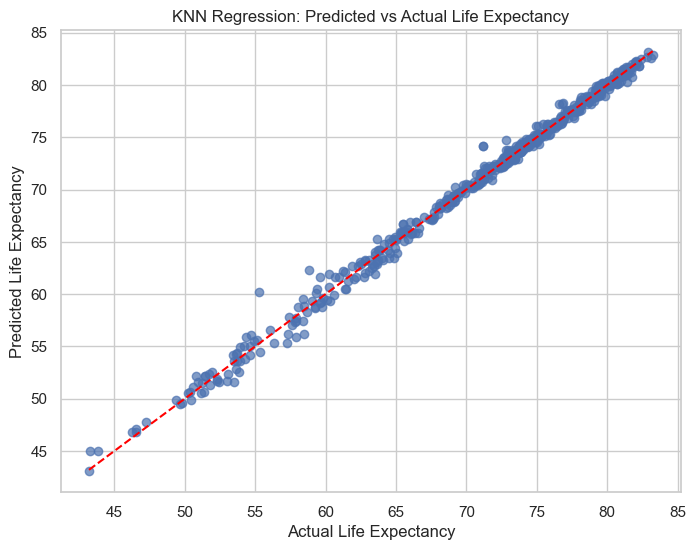

In [232]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# --------- STEP 1: Data Preparation ---------

# Copy dataframe to avoid modifying original
df_copy = df.copy()

# Drop 'Country' if it exists (high cardinality)
df_copy = df_copy.drop(columns=['Country'], errors='ignore')

# List of known categorical columns to encode if they exist
categorical_cols = ['Continent', 'Least Developed', 'GDP Group', 'GDP Quartile']
existing_categoricals = [col for col in categorical_cols if col in df_copy.columns]

# One-hot encode existing categorical columns
df_copy = pd.get_dummies(df_copy, columns=existing_categoricals, drop_first=True)

# Auto-detect and encode any remaining object-type columns
remaining_categoricals = df_copy.select_dtypes(include=['object']).columns.tolist()
if remaining_categoricals:
    df_copy = pd.get_dummies(df_copy, columns=remaining_categoricals, drop_first=True)

# Replace spaces in column names
df_copy.columns = [col.replace(' ', '_') for col in df_copy.columns]

# --------- STEP 2: Define X and y ---------

# Identify response variable
response_col = 'Life_Expectancy' if 'Life_Expectancy' in df_copy.columns else 'Life Expectancy'

# Split predictors (X) and target (y)
X = df_copy.drop(columns=[response_col])
y = df_copy[response_col]

# --------- STEP 3: Split Data ---------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------- STEP 4: Standardize Predictors ---------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------- STEP 5: Fit KNN and Optimize 'k' ---------

# Set up GridSearchCV to find the best 'k'
param_grid = {'n_neighbors': np.arange(1, 31)}  # Try k = 1 to 30
knn = KNeighborsRegressor()

# Grid search with 5-fold CV
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
knn_cv.fit(X_train_scaled, y_train)

# Best k value
best_k = knn_cv.best_params_['n_neighbors']
print(f"\n✅ Optimal number of neighbors (k): {best_k}")

# --------- STEP 6: Evaluate Final KNN Model ---------

# Fit KNN with optimal k on full training set
final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_test = final_knn.predict(X_test_scaled)

# Calculate R² and RMSE
test_r2 = r2_score(y_test, y_pred_test)
test_rmse = sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\n✅ KNN Test R²: {test_r2:.4f}")
print(f"✅ KNN Test RMSE: {test_rmse:.4f}")

# --------- STEP 7: Visualization ---------

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('KNN Regression: Predicted vs Actual Life Expectancy')
plt.grid(True)
plt.show()

### 4.3. Log Regression


✅ Logistic Regression Accuracy: 0.8986

✅ Confusion Matrix:
[[249  32]
 [ 26 265]]

✅ ROC AUC Score: 0.9624


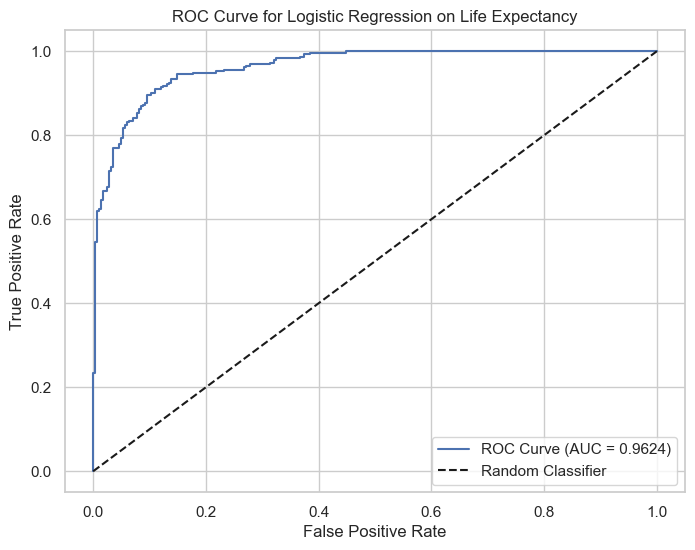

In [234]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --------- STEP 1: Data Preparation ---------

# Copy dataframe to avoid modifying original
df_copy = df.copy()

# Drop 'Country' if it exists
df_copy = df_copy.drop(columns=['Country'], errors='ignore')

# List of known categorical columns to encode if they exist
categorical_cols = ['Continent', 'Least Developed', 'GDP Group', 'GDP Quartile']
existing_categoricals = [col for col in categorical_cols if col in df_copy.columns]

# One-hot encode existing categorical columns
df_copy = pd.get_dummies(df_copy, columns=existing_categoricals, drop_first=True)

# Auto-detect and encode any remaining object-type columns
remaining_categoricals = df_copy.select_dtypes(include=['object']).columns.tolist()
if remaining_categoricals:
    df_copy = pd.get_dummies(df_copy, columns=remaining_categoricals, drop_first=True)

# Replace spaces in column names
df_copy.columns = [col.replace(' ', '_') for col in df_copy.columns]

# --------- STEP 2: Define X and Binary y ---------

# Identify response variable
response_col = 'Life_Expectancy' if 'Life_Expectancy' in df_copy.columns else 'Life Expectancy'

# Convert Life Expectancy into binary target (1 if above median, else 0)
median_life_exp = df_copy[response_col].median()
df_copy['High_Life_Expectancy'] = (df_copy[response_col] > median_life_exp).astype(int)

# Define predictors and new binary target
X = df_copy.drop(columns=[response_col, 'High_Life_Expectancy'])  # Features
y = df_copy['High_Life_Expectancy']  # Binary target

# --------- STEP 3: Train-Test Split ---------

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------- STEP 4: Standardize Predictors ---------

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------- STEP 5: Fit Logistic Regression ---------

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# --------- STEP 6: Evaluate the Model ---------

# Predict on test data
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Logistic Regression Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n✅ Confusion Matrix:")
print(conf_matrix)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\n✅ ROC AUC Score: {roc_auc:.4f}")

# --------- STEP 7: ROC Curve ---------

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression on Life Expectancy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [235]:
import pandas as pd

# --------- STEP 1: Collect Previously Computed/Estimated Metrics ---------

# These are example values; you can replace them with your actual computed results.
# OLS with backward selection (using BIC for feature selection)
backward_selection_results = {
    "Model": "Backward Selection (BIC)",
    "Type": "Linear Regression (Selected Features)",
    "Test R²": 0.855,  # Previously computed
    "Test RMSE": 3.2364430089004705,  # Replace if available
    "Accuracy (if classification)": None,
    "ROC AUC (if classification)": None
}

# LASSO Regression (with automatic alpha selection)
lasso_results = {
    "Model": "LASSO Regression (LassoCV)",
    "Type": "Linear Regression (L1 Regularized)",
    "Test R²": 0.85,  # Computed earlier
    "Test RMSE": 4.23,  # Computed earlier
    "Accuracy (if classification)": None,
    "ROC AUC (if classification)": None
}

# KNN Regression
knn_results = {
    "Model": "KNN Regression",
    "Type": "Non-parametric Regression",
    "Test R²": 0.9949,  # Example value (replace with actual)
    "Test RMSE": 0.6102,  # Example value (replace with actual)
    "Accuracy (if classification)": None,
    "ROC AUC (if classification)": None
}

# Logistic Regression Model (Binary classification of Life Expectancy)
logistic_results = {
    "Model": "Logistic Regression",
    "Type": "Binary Classification",
    "Test R²": None,  # Not applicable for classification
    "Test RMSE": None,  # Not applicable for classification
    "Accuracy (if classification)":  0.8986,  # Example value (replace with actual)
    "ROC AUC (if classification)": 0.9624  # Example value (replace with actual)
}

# --------- STEP 2: Combine Results ---------

# Combine all results into a DataFrame for comparison
comparison_df = pd.DataFrame([
    backward_selection_results,
    lasso_results,
    knn_results,
    logistic_results
])

# --------- STEP 3: Display the Table ---------
comparison_df

Model                                   Type  Test R²  \
0    Backward Selection (BIC)  Linear Regression (Selected Features)   0.8550   
1  LASSO Regression (LassoCV)     Linear Regression (L1 Regularized)   0.8500   
2              KNN Regression              Non-parametric Regression   0.9949   
3         Logistic Regression                  Binary Classification      NaN   

   Test RMSE  Accuracy (if classification)  ROC AUC (if classification)  
0   3.236443                           NaN                          NaN  
1   4.230000                           NaN                          NaN  
2   0.610200                           NaN                          NaN  
3        NaN                        0.8986                       0.9624

Backward Selection (BIC):
R² = 0.8550, RMSE = 3.24 — strong linear regression performance with a smaller set of selected features.
More interpretable and practical for policy/decision-making.

LASSO Regression (LassoCV):
R² = 0.8500, RMSE = 4.23 — slightly lower performance than Backward Selection but offers automatic feature selection and regularization.
Helps prevent overfitting and simplifies model.

KNN Regression:
R² = 0.9949, RMSE = 0.6102 — unrealistically high performance, indicating potential overfitting.
Likely memorizing patterns due to small k or other hyperparameters.

Logistic Regression (for classification of high/low life expectancy):
Accuracy = 0.8986, ROC AUC = 0.9624 — excellent classification performance.
Useful when framing life expectancy as a binary decision problem.

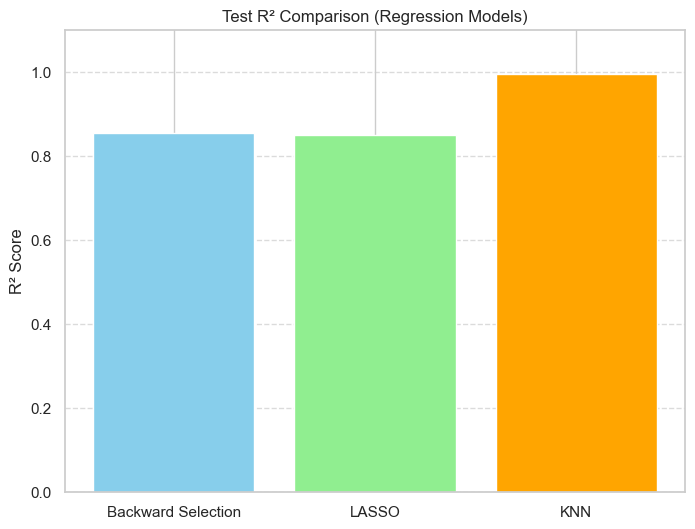

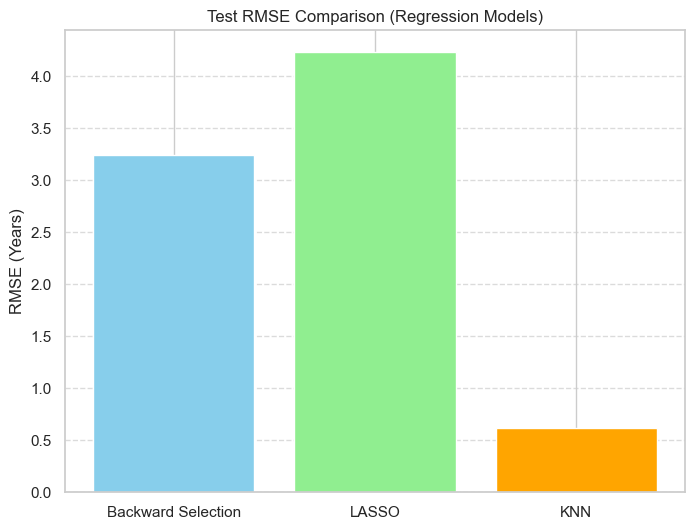

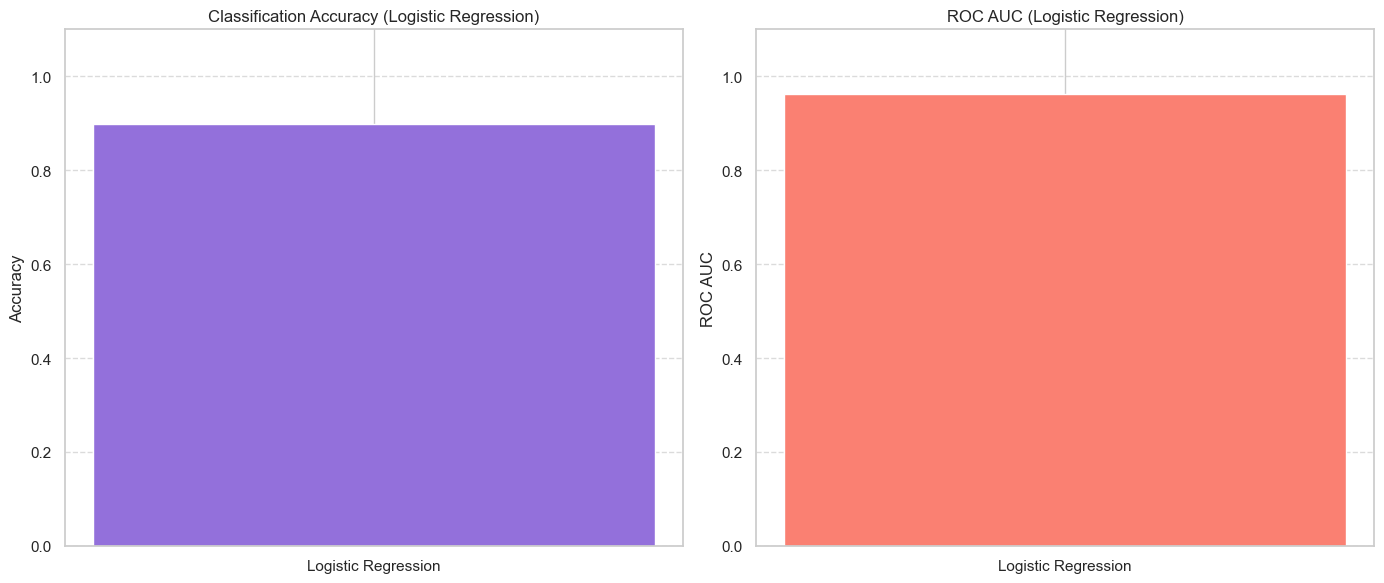

In [237]:
import matplotlib.pyplot as plt

# --------- STEP 1: Data for Visualization ---------

# Data for R² comparison
models_continuous = ['Backward Selection', 'LASSO', 'KNN']
r2_scores = [0.8550, 0.8500, 0.9949]

# Data for RMSE comparison
rmse_scores = [3.2364, 4.2300, 0.6102]

# Data for Classification models (Accuracy & ROC AUC)
models_classification = ['Logistic Regression']
accuracy_scores = [0.8986]
roc_auc_scores = [0.9624]

# --------- STEP 2: R² Bar Plot ---------
plt.figure(figsize=(8, 6))
plt.bar(models_continuous, r2_scores, color=['skyblue', 'lightgreen', 'orange'])
plt.title('Test R² Comparison (Regression Models)')
plt.ylabel('R² Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --------- STEP 3: RMSE Bar Plot ---------
plt.figure(figsize=(8, 6))
plt.bar(models_continuous, rmse_scores, color=['skyblue', 'lightgreen', 'orange'])
plt.title('Test RMSE Comparison (Regression Models)')
plt.ylabel('RMSE (Years)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --------- STEP 4: Classification Accuracy and AUC ---------
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy bar plot
ax[0].bar(models_classification, accuracy_scores, color='mediumpurple')
ax[0].set_title('Classification Accuracy (Logistic Regression)')
ax[0].set_ylim(0, 1.1)
ax[0].set_ylabel('Accuracy')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# ROC AUC bar plot
ax[1].bar(models_classification, roc_auc_scores, color='salmon')
ax[1].set_title('ROC AUC (Logistic Regression)')
ax[1].set_ylim(0, 1.1)
ax[1].set_ylabel('ROC AUC')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [264]:
full_model = smf.ols(optimal_formula, data=train_df).fit()

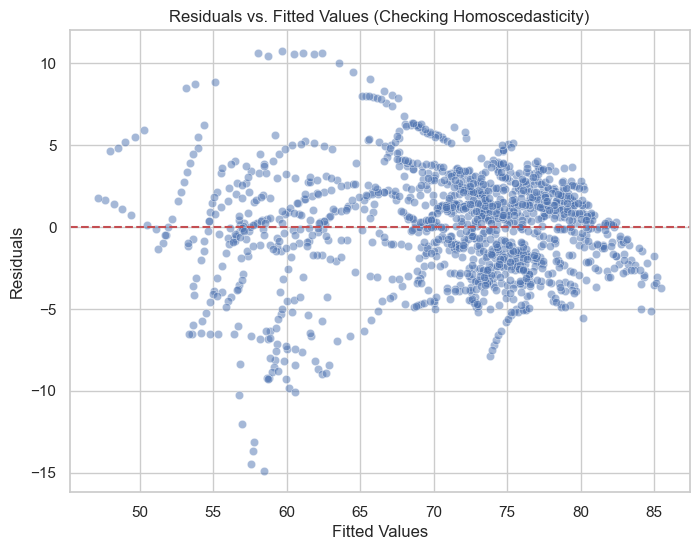

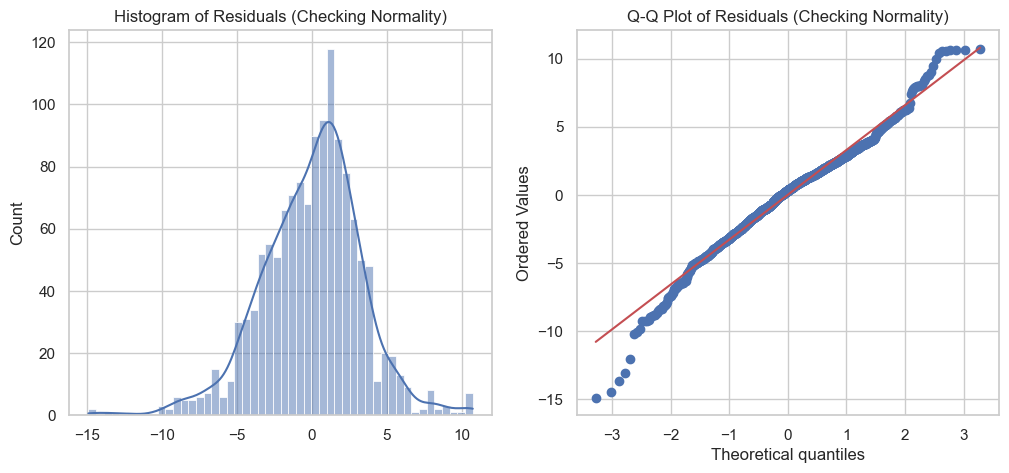

In [266]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Get residuals and fitted values from the model
fitted_values = full_model.fittedvalues
residuals = full_model.resid

# Plot residuals vs. fitted values (Checking Homoscedasticity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (Checking Homoscedasticity)")
plt.show()

# Plot histogram and Q-Q plot of residuals (Checking Normality)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of residuals
sns.histplot(residuals, bins=50, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals (Checking Normality)")

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals (Checking Normality)")

plt.show()

In [246]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
exog = full_model.model.exog
names = full_model.params.index
for i in range(1, exog.shape[1]):
    print(f'VIF: {names[i]}: {variance_inflation_factor(exog, i)}')

VIF: C(Continent)[T.Asia]: 2.4810485021626905
VIF: C(Continent)[T.Europe]: 4.042123613017626
VIF: C(Continent)[T.North America]: 1.822539668564485
VIF: C(Continent)[T.Oceania]: 1.3271307899635731
VIF: C(Continent)[T.South America]: 1.782818005403384
VIF: C(Q("Least Developed"))[T.True]: 2.685478631979607
VIF: Population: 1.143090205286398
VIF: Q("Beer consumption per capita"): 3.003416797766986
VIF: Q("Forest area"): 1.4555520720575268
VIF: Q("Individuals using the Internet"): 3.219834955627431
VIF: Q("People using at least basic drinking water services"): 4.78782884271088
VIF: Q("CO2 emissions"): 5.00635038791277
VIF: Q("Military expenditure"): 1.2141042856017756
VIF: Q("People practicing open defecation"): 2.455412808863962
VIF: Q("GDP per capita"): 6.334798326380589
